In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from src.plot_settings import (
    ps_defaults,
    label_subplots,
    get_dim,
    set_dim,
    PALETTE,
    STD_CLR_LIST,
    CAM_BLUE,
    BRICK_RED,
    OX_BLUE,
)
ps_defaults(use_tex=True, dpi=300)

In [149]:
from src.read_in_data import ReadData
import xarray as xr

In [248]:
read = ReadData()
read.param

['1013.0', '1013.0', 'PDS', 'Ambient surface pressure (mb)']
['5.0', '5.0', 'FC', 'Coriolis parameter (10**-5 s**-1)']
['1.0', '1.0', 'CD', 'Surface drag coefficient (10**-3)']
['1.0', '1.0', 'CE', 'Surface enthalpy coefficient (10**-3)']
['4.0', '4.0', 'CD1', 'Wind-dependence of surface flux (s/m *10**-5)']
['3.0', '3.0', 'CDCAP', 'Maximum value of drag coef. (10**-3)']
['3.0', '3.0', 'CKCAP', 'Maximum value of enthalpy coef. (10**-3)']
['200.0', '200.0', 'VCAP', 'Cap on wind speed (m/s) used in surface sensible and latent flux']
['y', 'y', 'PDEP', 'Pressure-dependent sea surface enthalpy?']
['250.0', '250.0', 'XHL', 'Horizontal mixing length (m)']
['500.0', '500.0', 'XVL', 'Vertical mixing length (m)']
['1.0', '1.0', 'DISS', 'Coefficient of dissipative heating (0-1)']
['12.0', '12.0', 'TAUR', 'Radiative relaxation time scale (hrs)']
['2.0', '2.0', 'RADMAX', 'Cap on radiative cooling (C/day)']
['0.1', '0.1', 'ACT', 'Autoconversion threshold (gm/Kg)']
['0.0', '0.0', 'VTERM', 'Precipita

{'PDS': 1013.0 <Unit('millibar')>,
 'FC': 5e-05 <Unit('1 / second')>,
 'CD': 0.001,
 'CE': 0.001,
 'CD1': 4e-05 <Unit('second / meter')>,
 'CDCAP': '3.0',
 'CKCAP': '3.0',
 'VCAP': 200.0 <Unit('meter / second')>,
 'PDEP': 'y',
 'XHL': 250.0 <Unit('meter')>,
 'XVL': 500.0 <Unit('meter')>,
 'DISS': 1.0,
 'TAUR': 12.0 <Unit('hour')>,
 'RADMAX': 2.0 <Unit('delta_degree_Celsius / day')>,
 'ACT': '0.1',
 'VTERM': 0.0 <Unit('meter / second')>,
 'VTERMSNOW': 2.0 <Unit('meter / second')>,
 'EVAP': 'y',
 'TMIN': 133.0 <Unit('kelvin')>,
 'RMAX': 100.0 <Unit('kilometer')>,
 'RO': 600.0 <Unit('kilometer')>,
 'VMAX': 18.0 <Unit('meter / second')>,
 'TMID': 0.0 <Unit('kelvin')>,
 'RSST': 100.0 <Unit('kilometer')>,
 'DT': 5.0 <Unit('second')>,
 'NS': 5.0,
 'EPS': '0.1',
 'ALPHA': '0.01',
 'RB': 1500.0 <Unit('kilometer')>,
 'ZB': 25.0 <Unit('kilometer')>,
 'NSPONGE': '5',
 'ETIME': 20.0 <Unit('day')>,
 'TAVE': 1.0 <Unit('day')>,
 'PLTIME': 2.0 <Unit('day')>,
 'TIMMAX': 5.0 <Unit('hour')>,
 'TIMEPL': 0.

In [189]:
read.get_tab_array(name="zgraph" + ".out", delim=" ")[0].shape

(64,)

In [188]:
read.get_tab_array(name="rgraph" + ".out", delim=" ")[0].shape

(266,)

In [280]:
ds_uv, ds_pq = read.get_time_datasets()

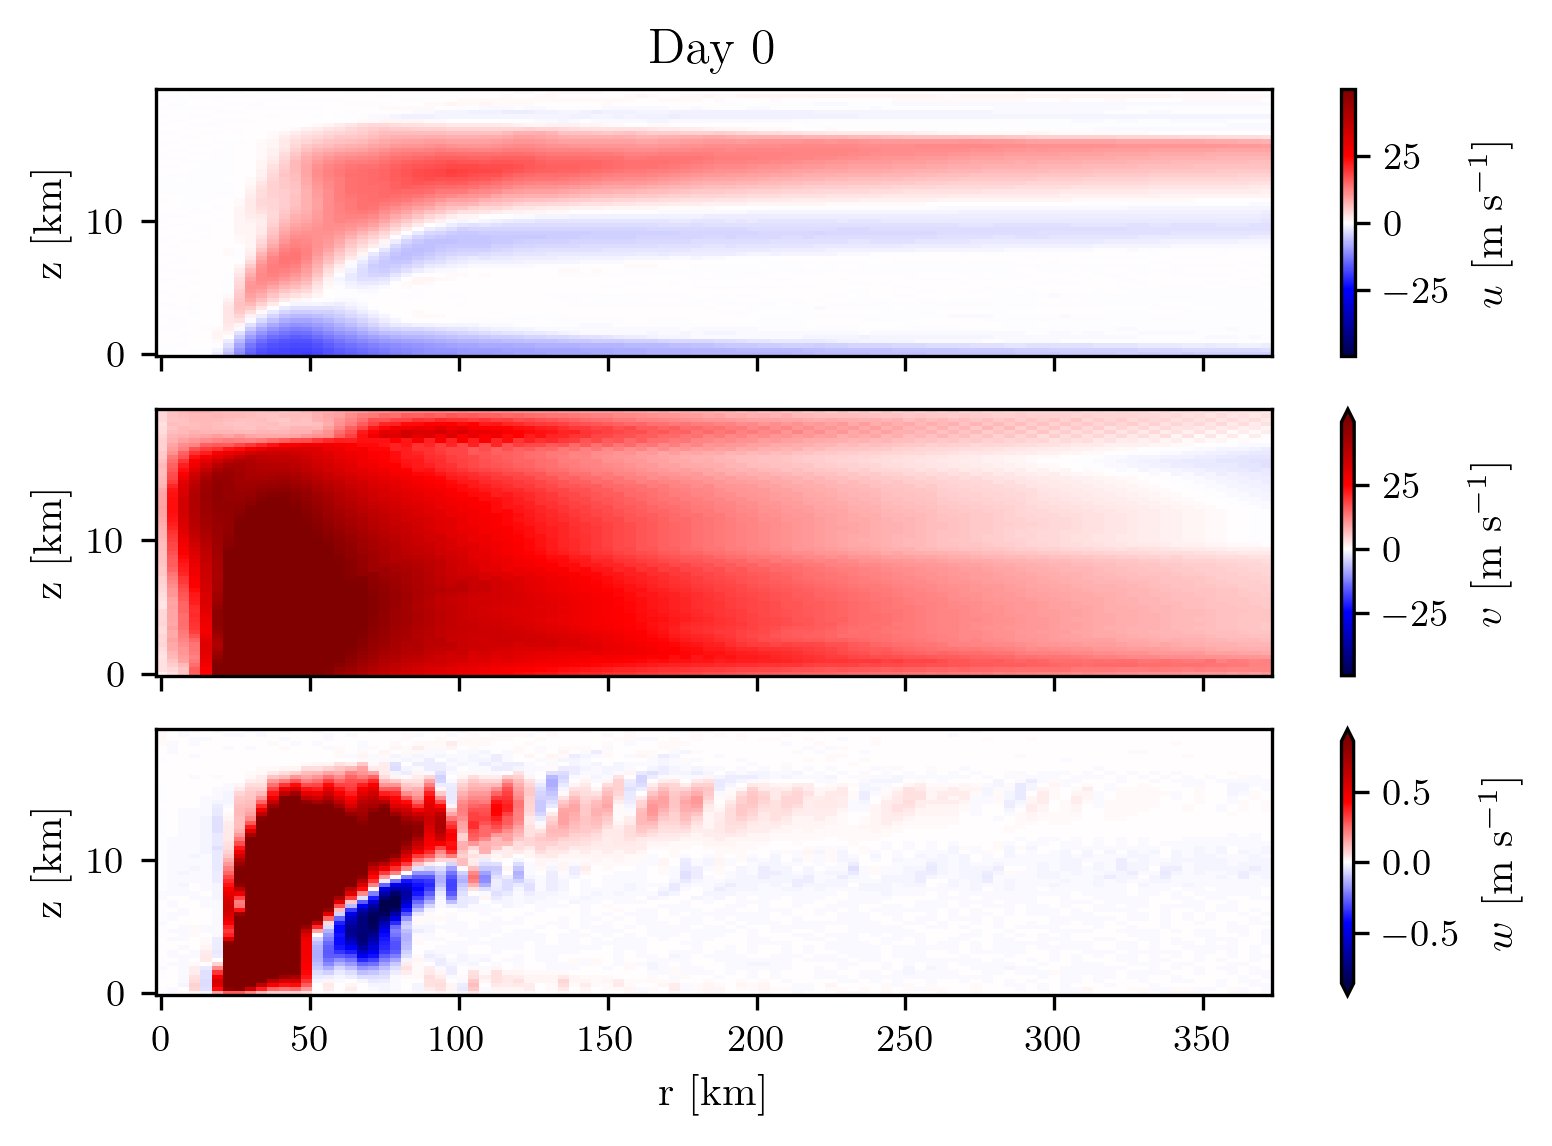

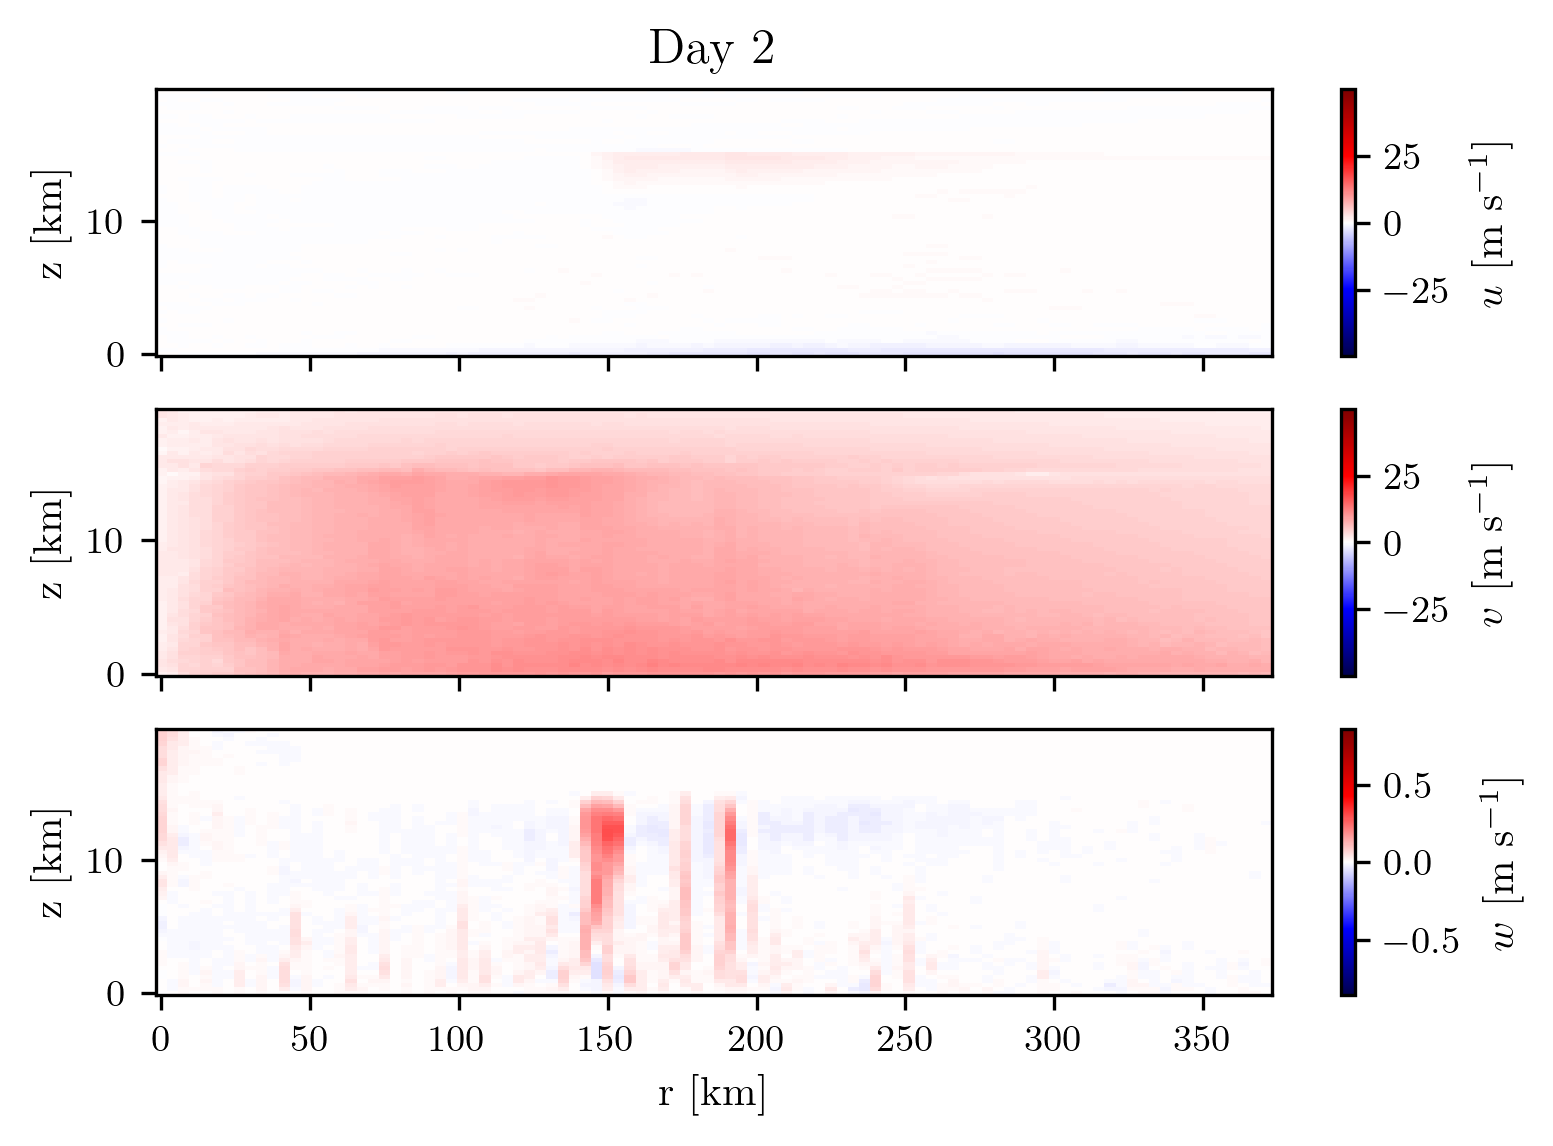

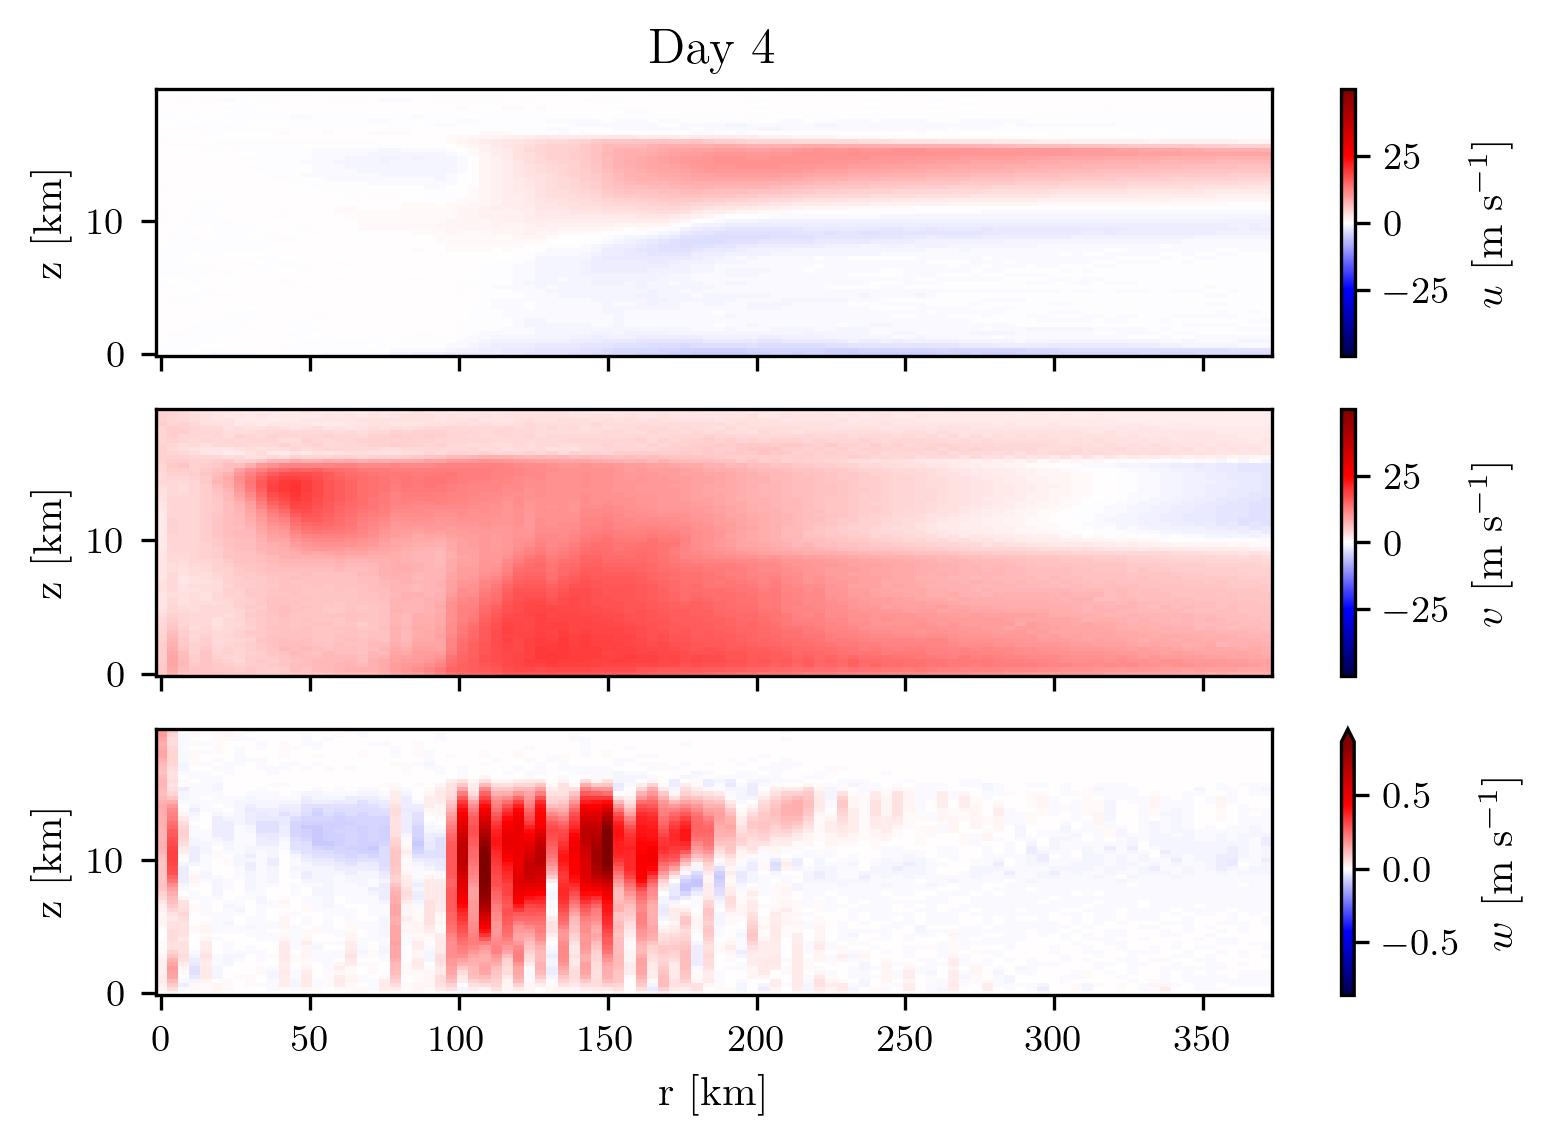

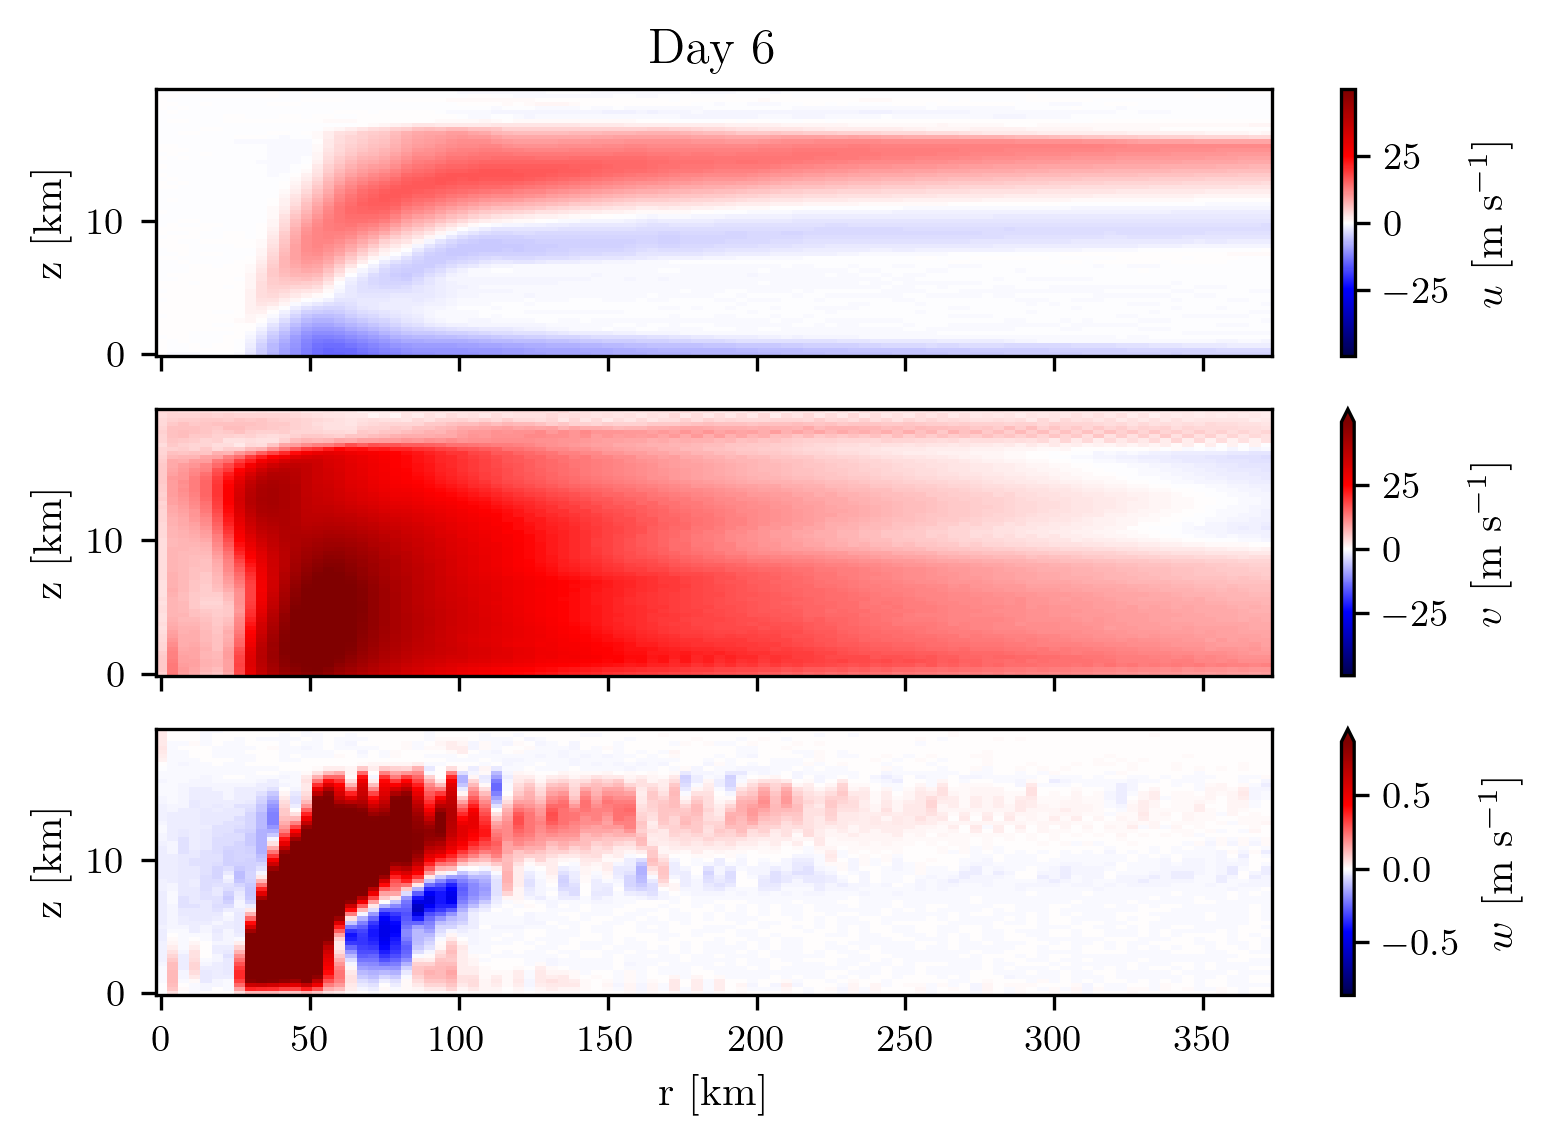

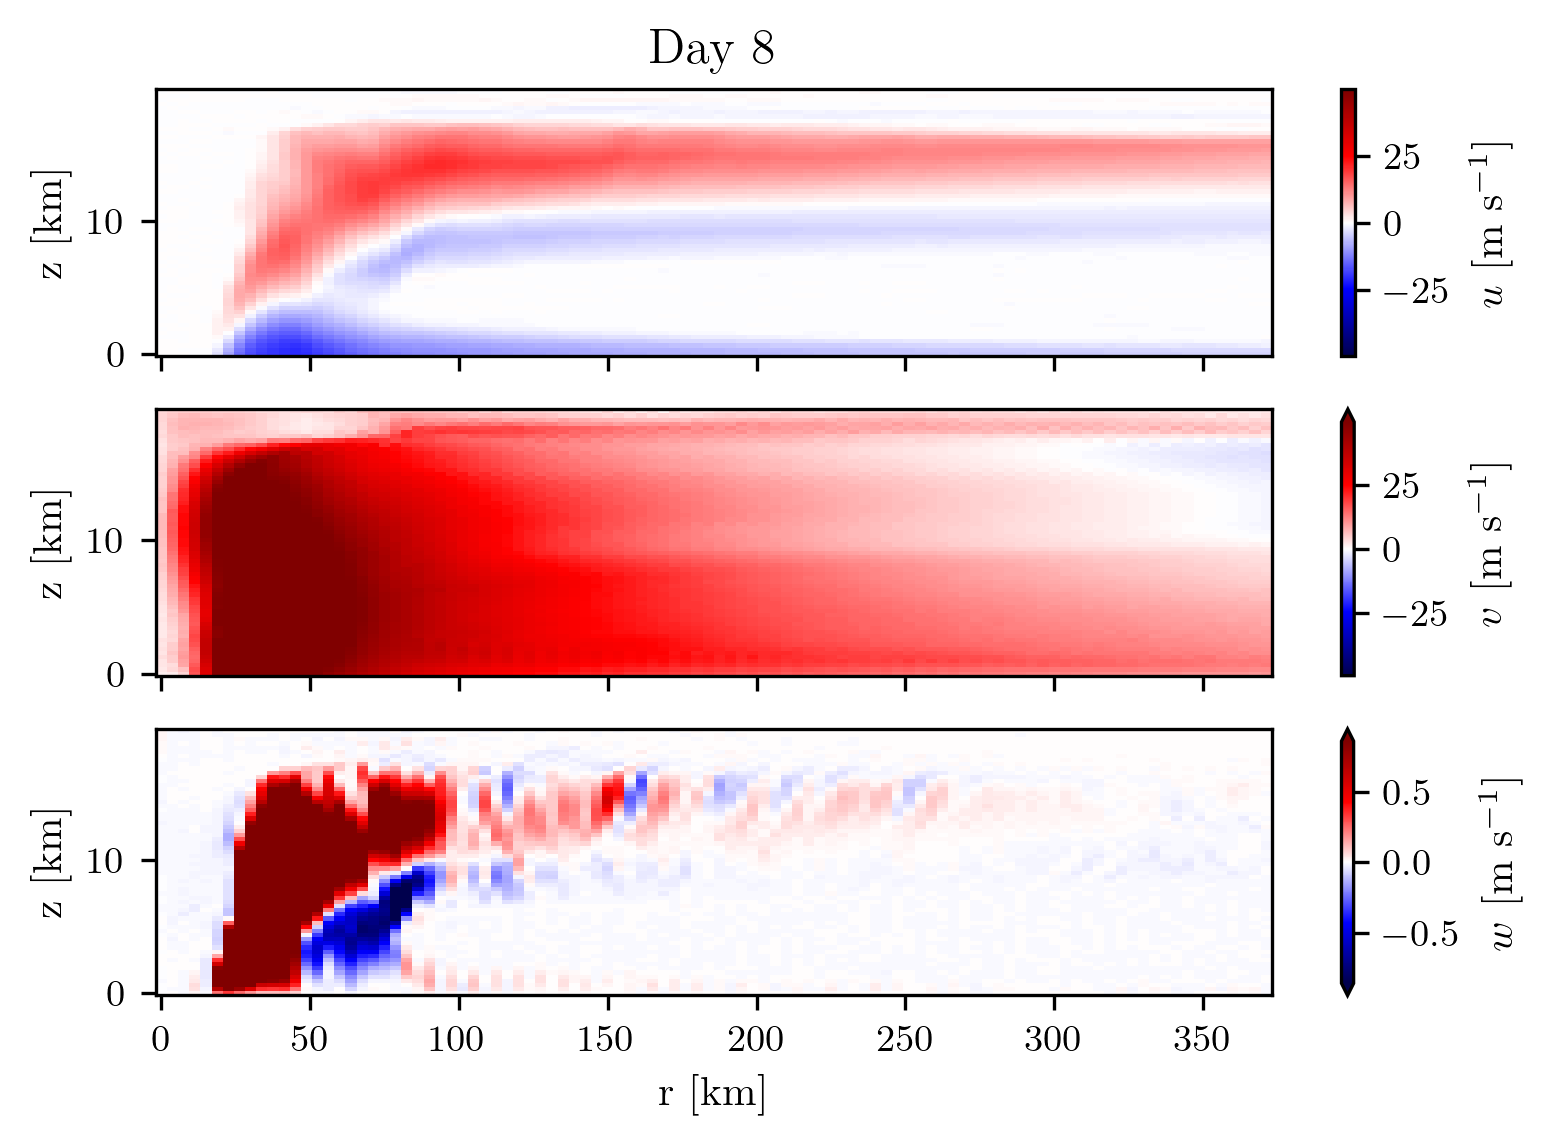

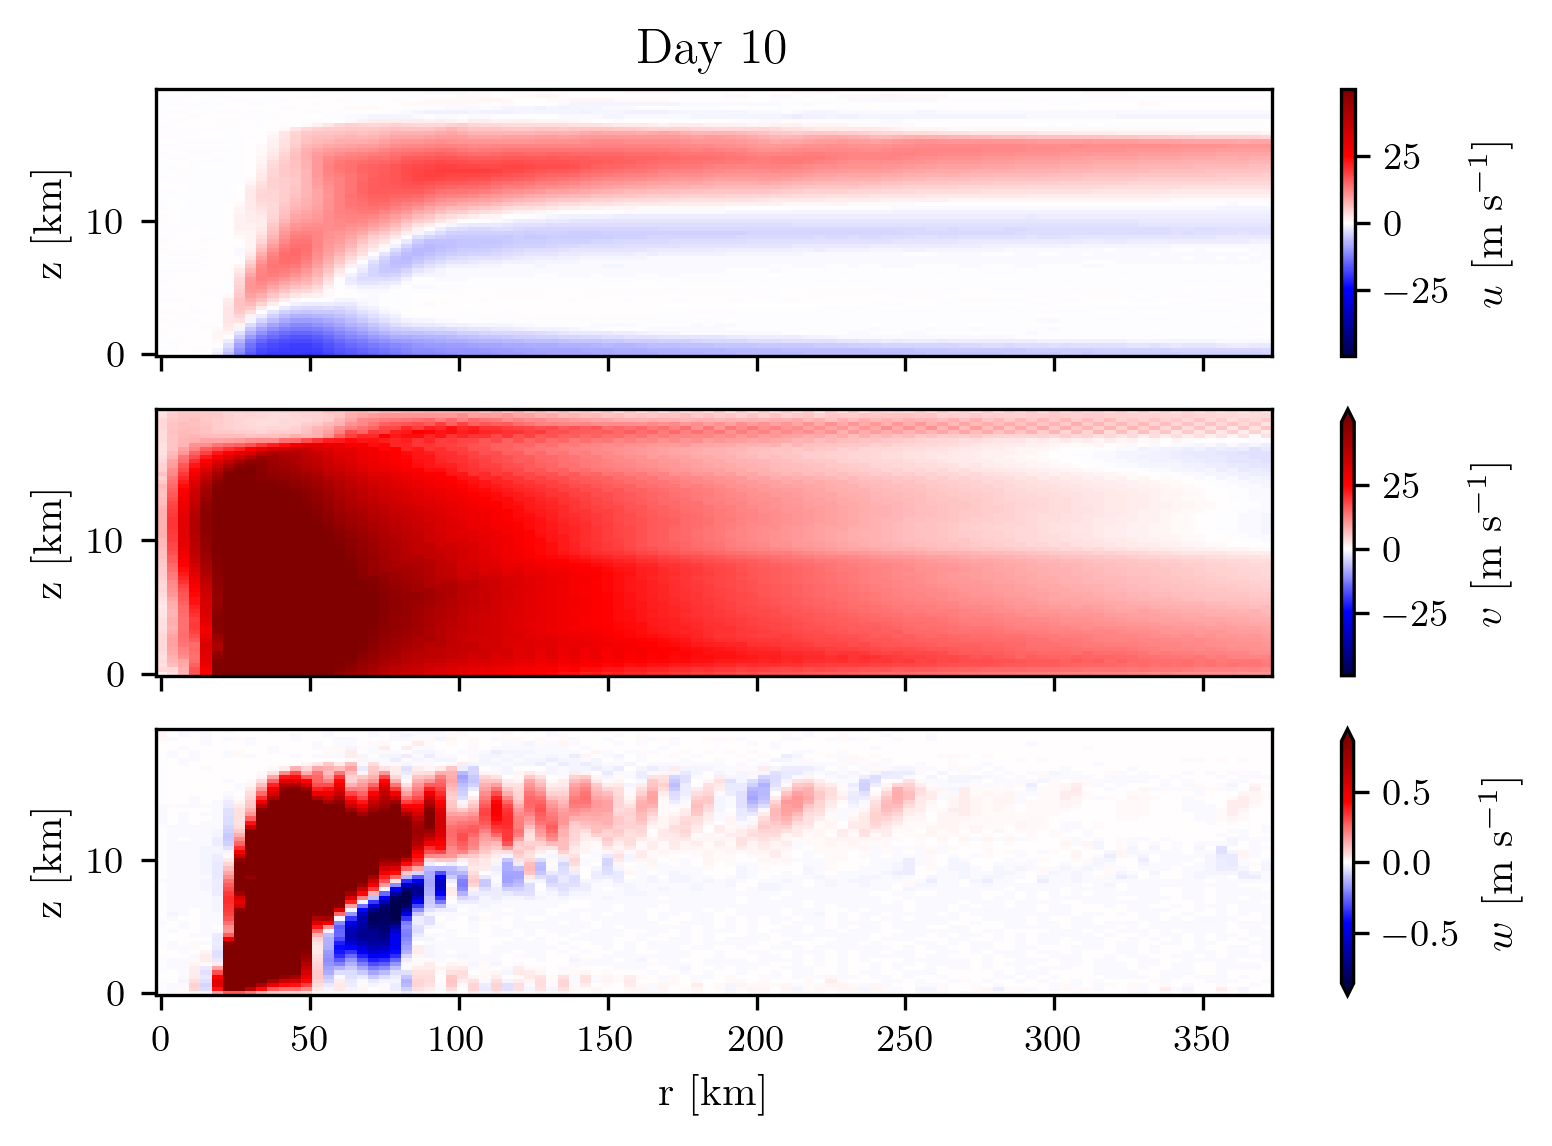

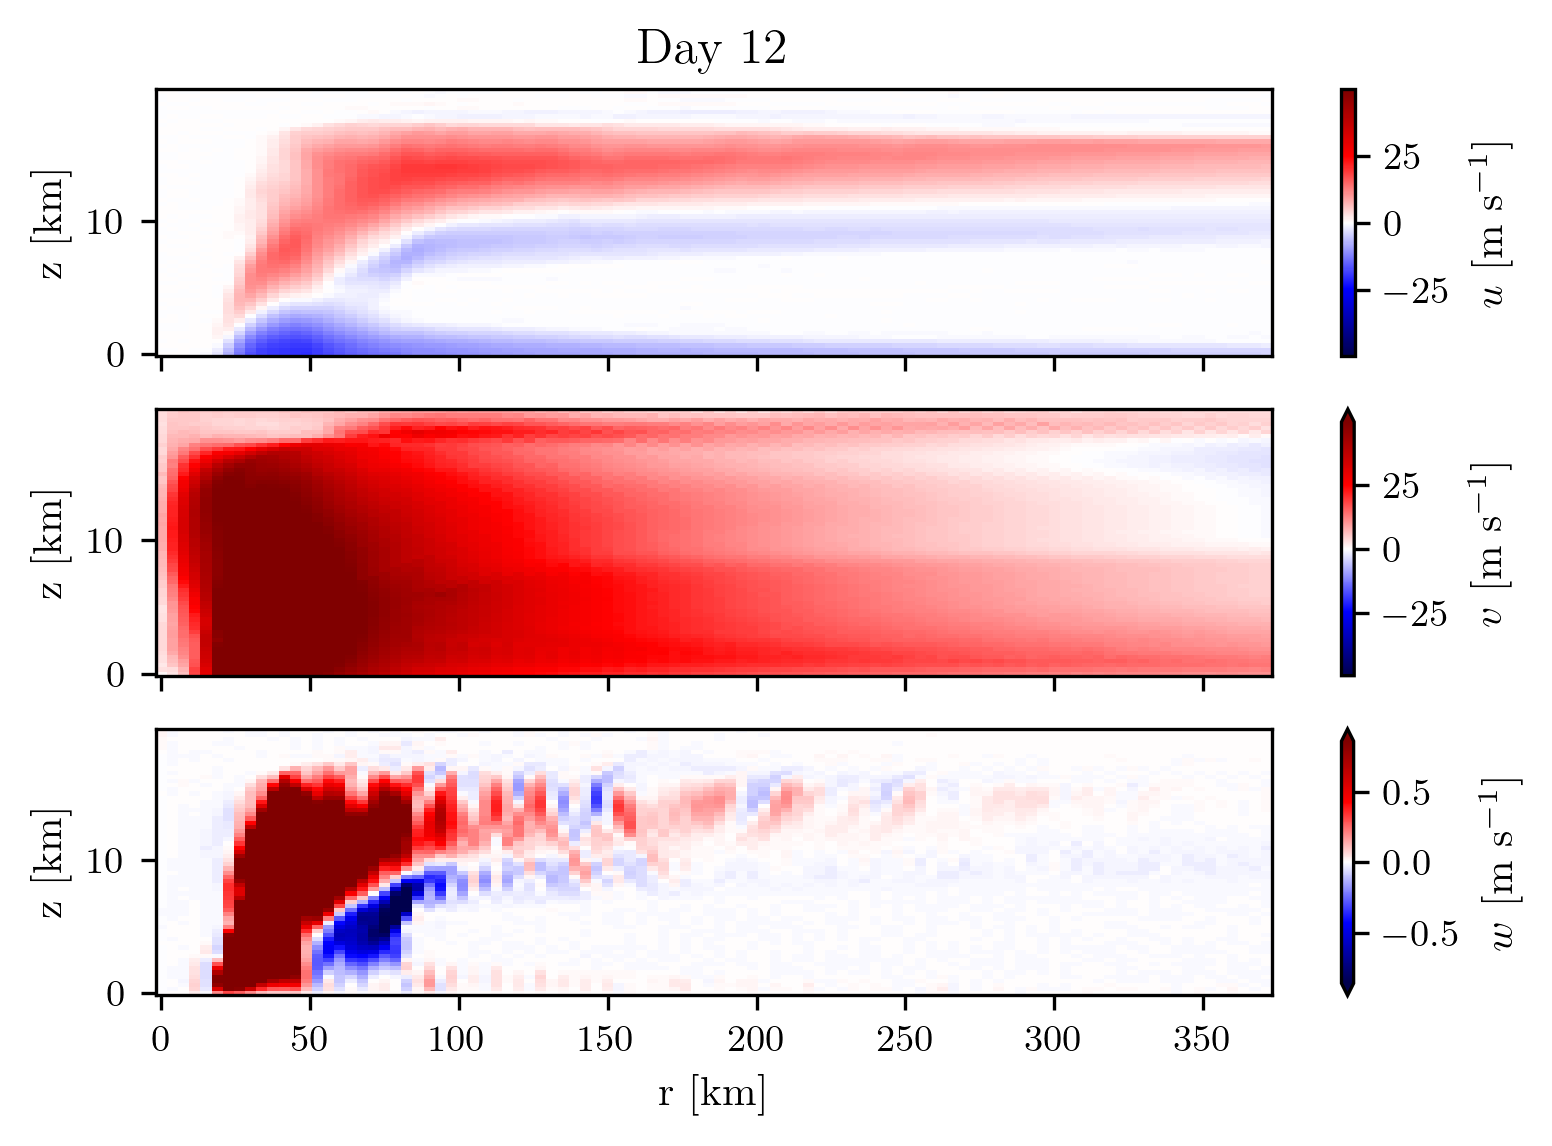

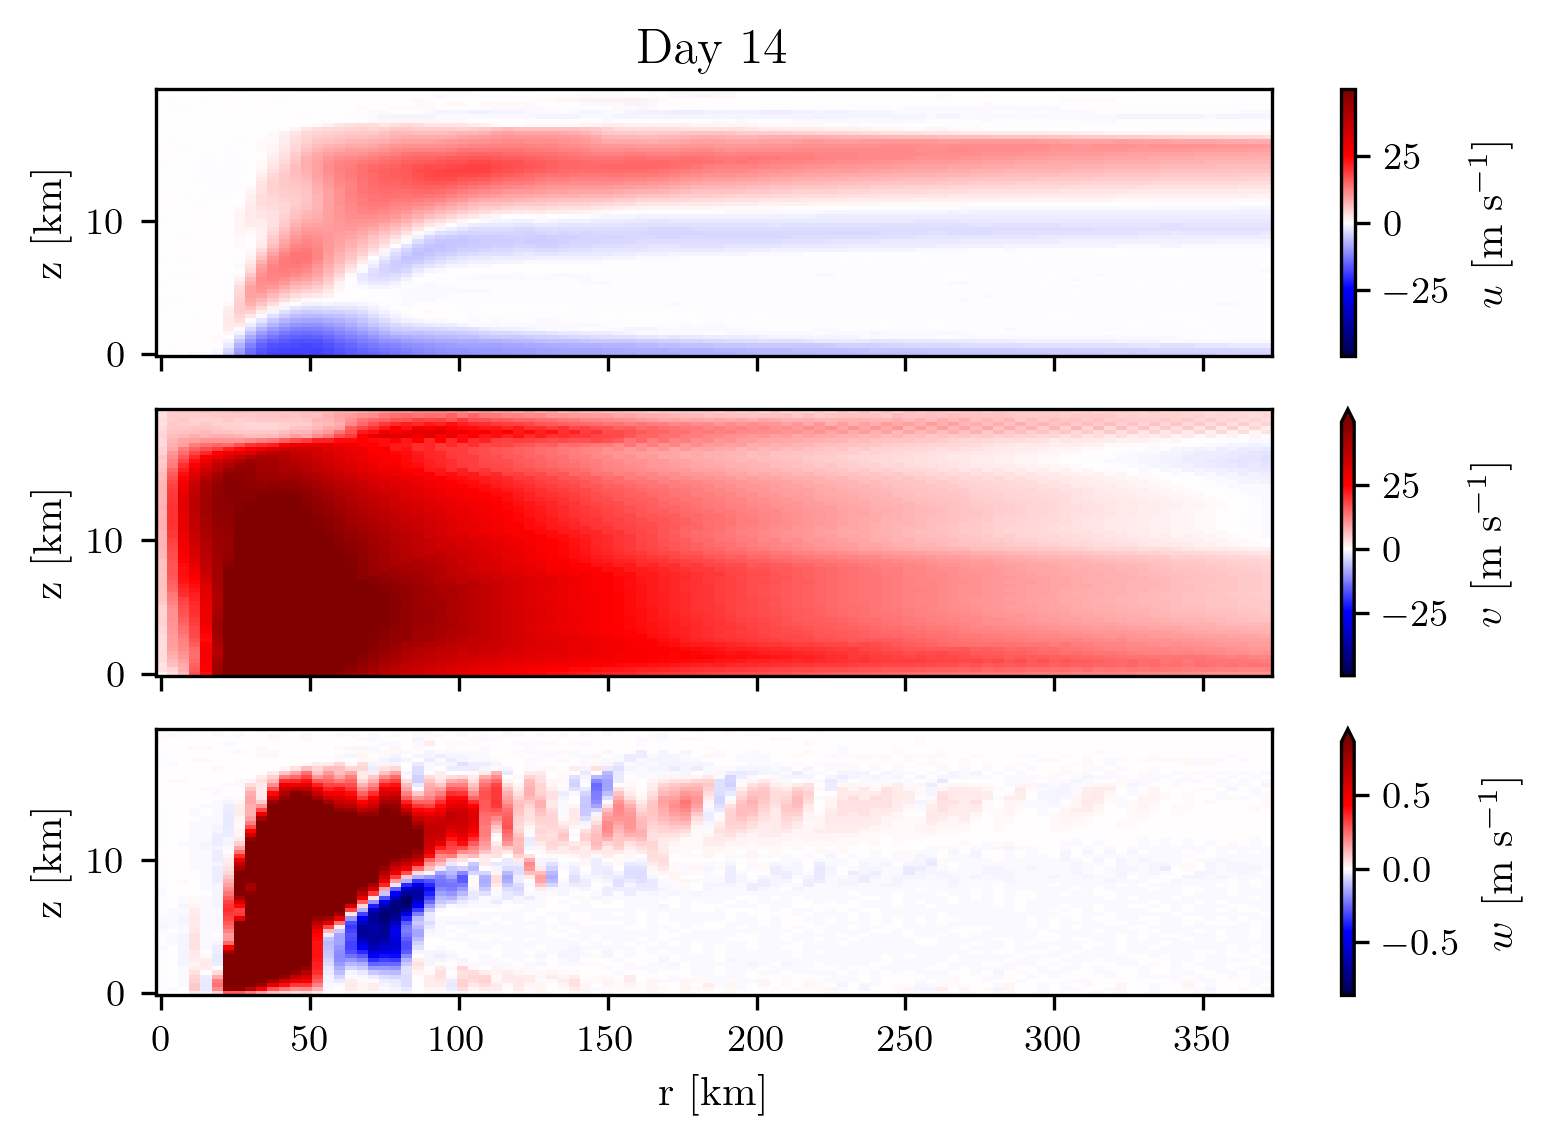

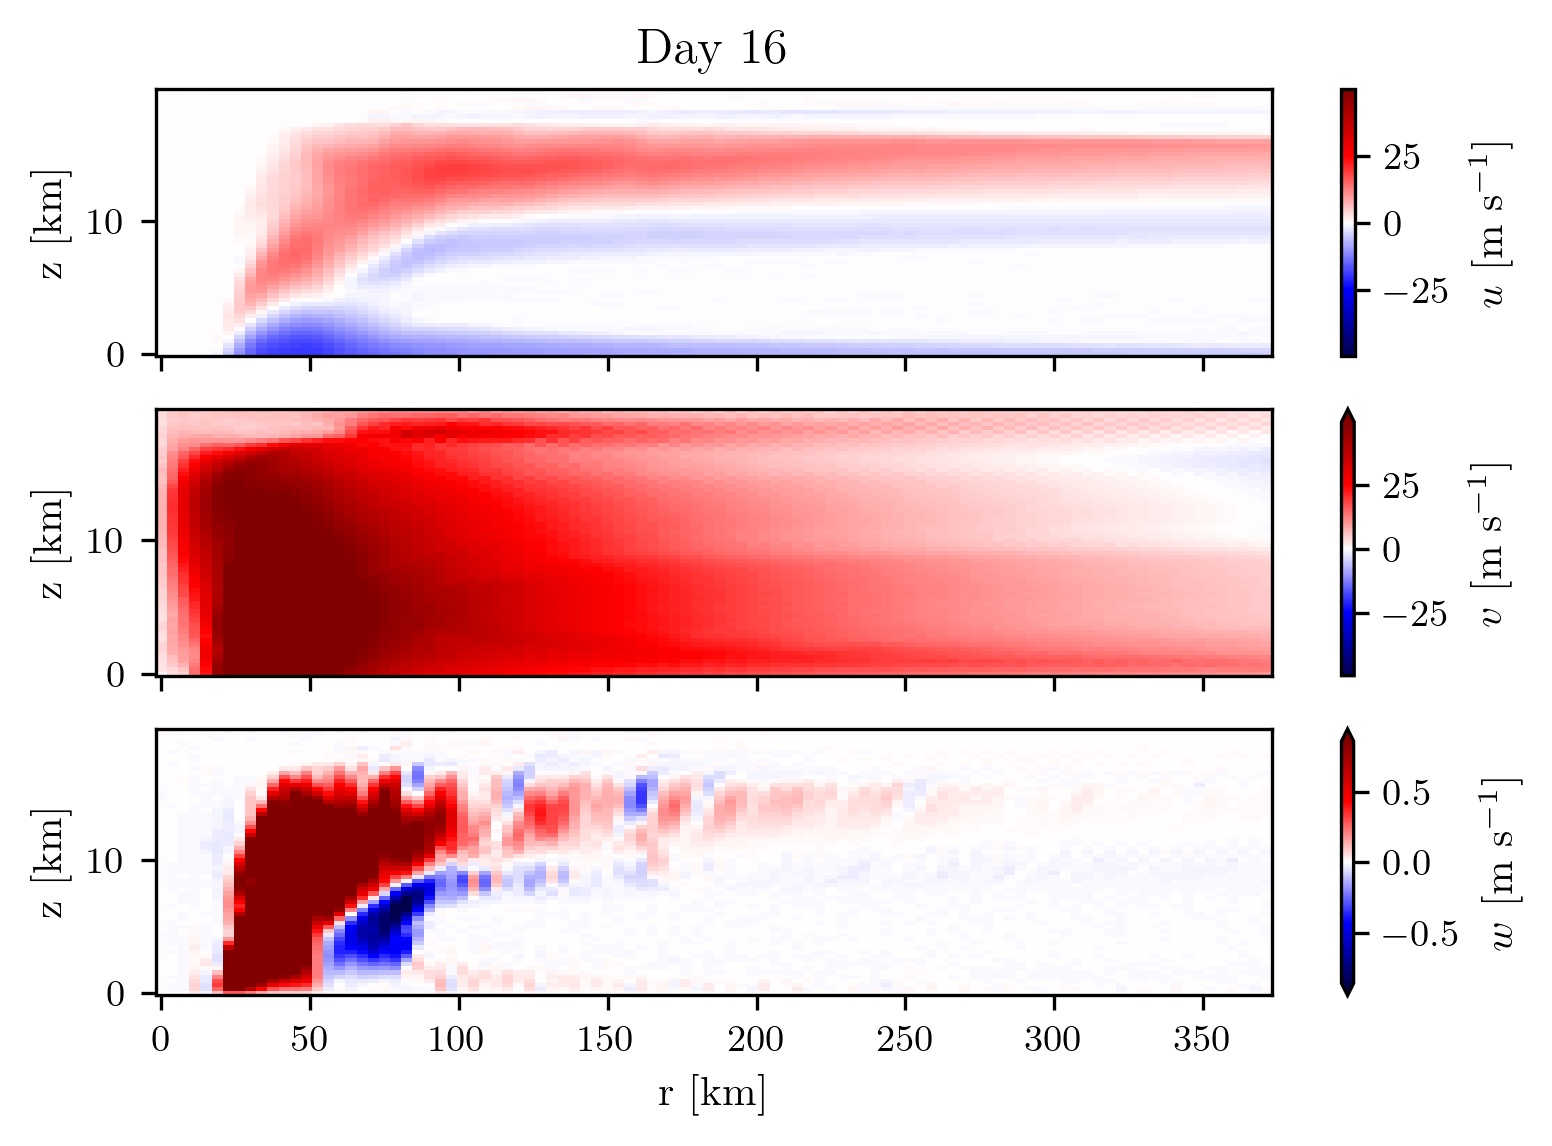

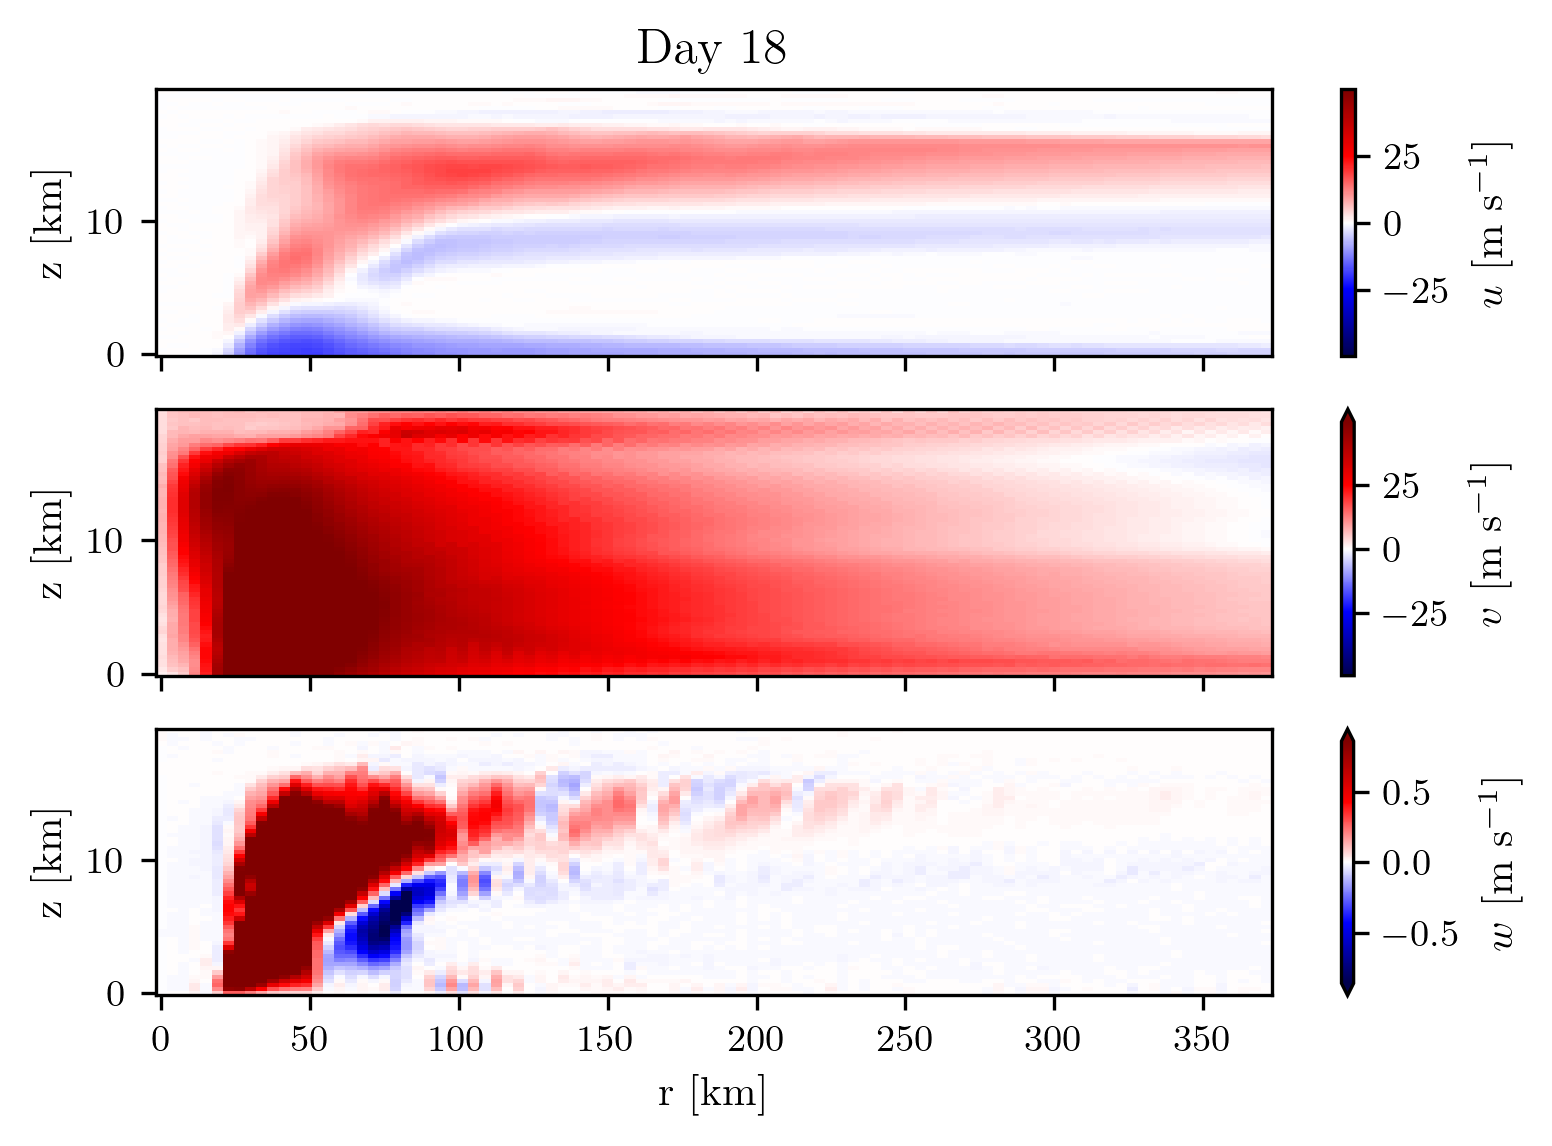

In [283]:
def balance(tup):
    return min(tup[0], -tup[1]), max(-tup[0], tup[1])

def mi(a):
    return np.percentile(a, 2)
def ma(a):
    return np.percentile(a, 98)

umin, umax = balance((mi(ds_uv.ucon.values), ma(ds_uv.vcon.values)))
vmin, vmax = balance((mi(ds_uv.vcon.values), ma(ds_uv.vcon.values)))
wmin, wmax = balance((mi(ds_uv.wcon.values), ma(ds_uv.wcon.values)))

cmap = "seismic"
time = 9

for time in range(10):

    fig, axs = plt.subplots(3, 1, sharex=True)
    ds_uv.ucon.isel(T=time, x=slice(0, 100)).plot(ax=axs[0], # x="x", y="y", 
                                 vmin=umin, vmax=umax, cmap=cmap, cbar_kwargs={"label": "$u$ [m s$^{-1}$]"})
    axs[0].set_xlabel("")
    axs[0].set_title("Day " +"{:.0f}".format(ds_uv.coords["T"].values[time]))
    ds_uv.vcon.isel(T=time, x=slice(0, 100)).plot(ax=axs[1], # x="x", y="y", 
                                 vmin=vmin, vmax=vmax, cmap=cmap, cbar_kwargs={"label": "$v$ [m s$^{-1}$]"})
    axs[1].set_xlabel("")
    axs[1].set_title("")
    ds_uv.wcon.isel(T=time, x=slice(0, 100)).plot(ax=axs[2], # x="x", y="y", 
                                 vmin=wmin, vmax=wmax, cmap=cmap, 
                                                  cbar_kwargs={"label": "$w$ [m s$^{-1}$]"})
    axs[2].set_title("")
    plt.show()

In [53]:
sout_ds = get_s(name="s.out")
sin_ds = get_s(name="s.in")

1.3.1


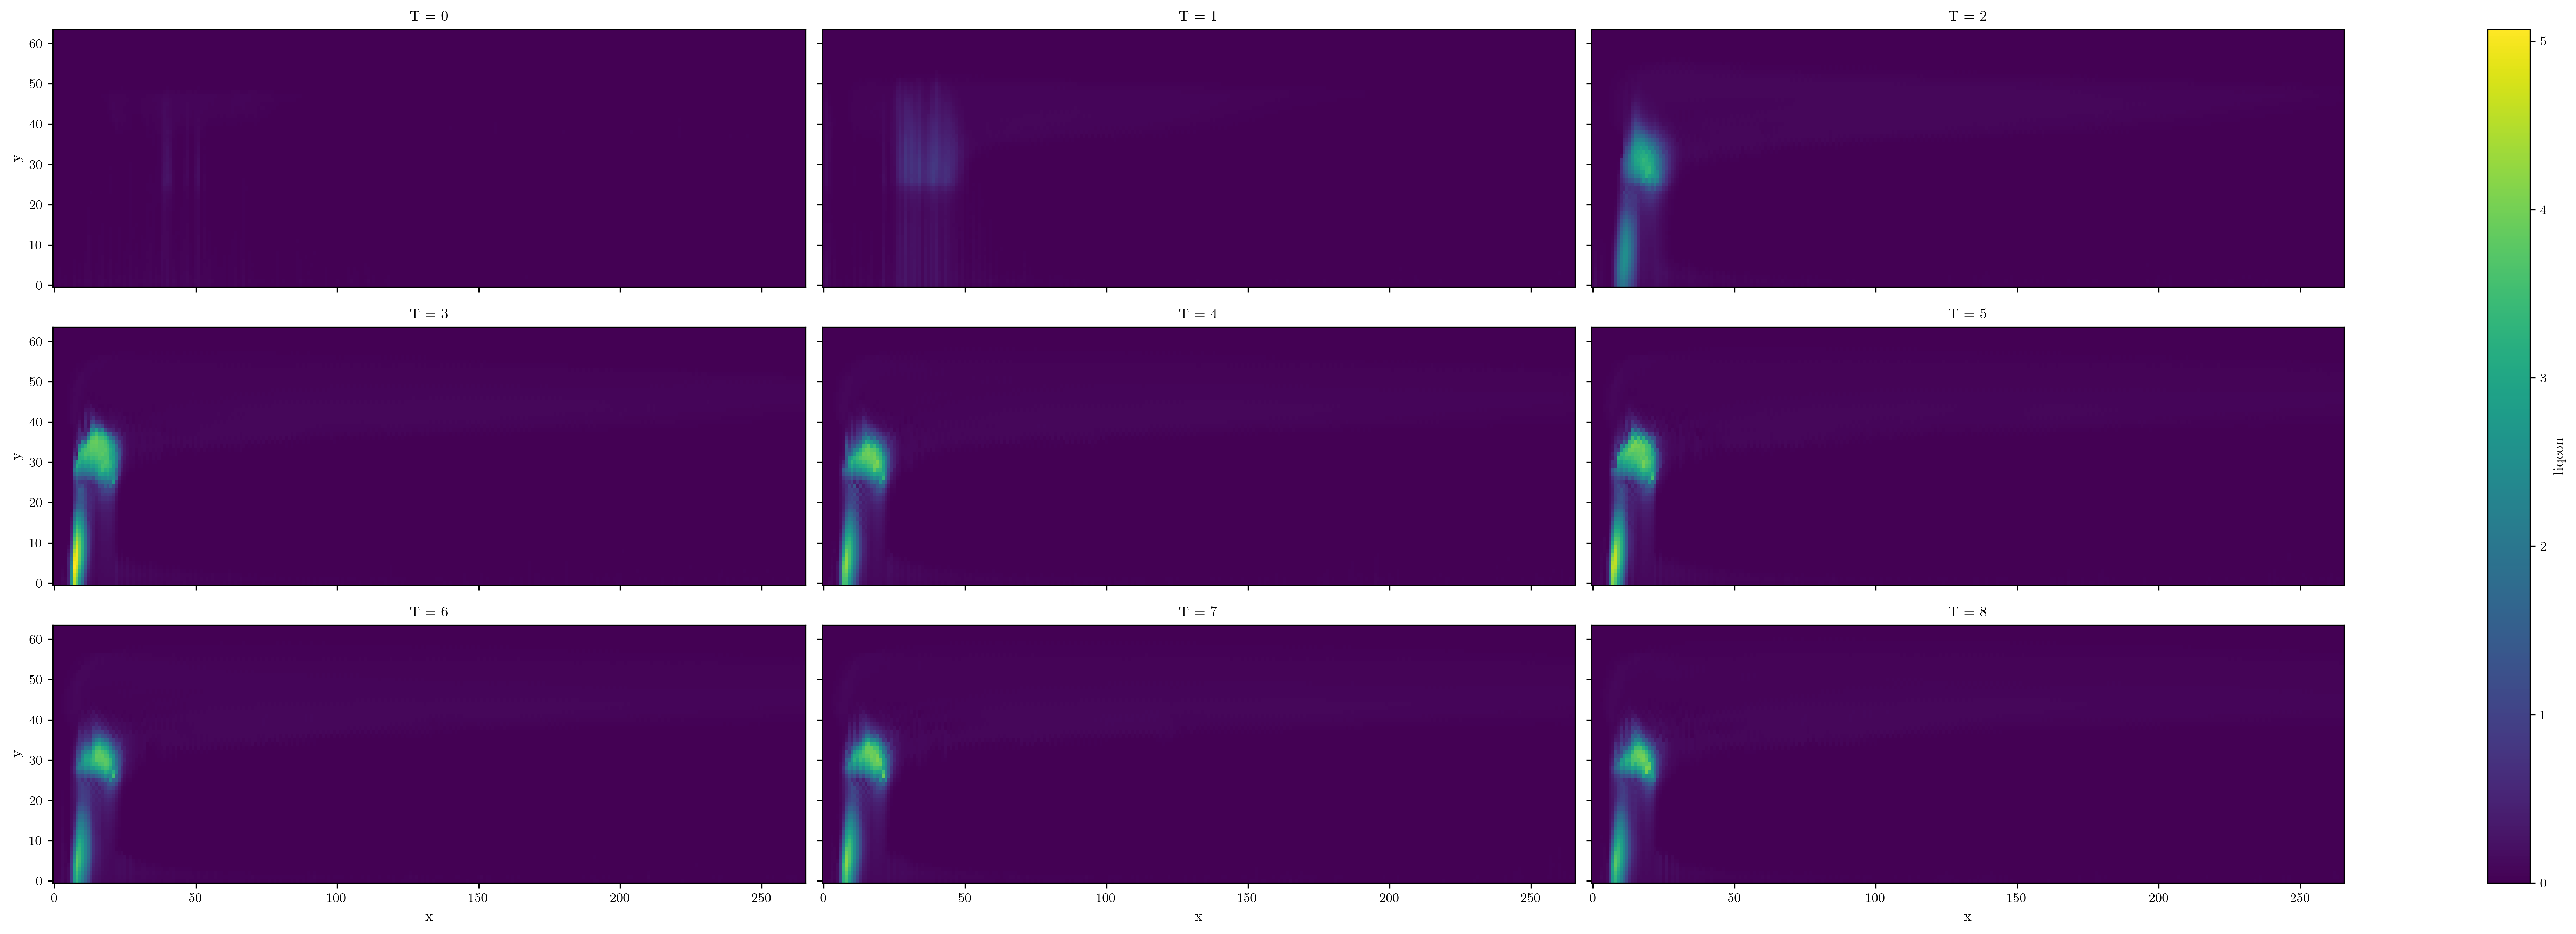

In [137]:
a.liqcon.plot(x="x", y="y", col="T", col_wrap=3, aspect=3)

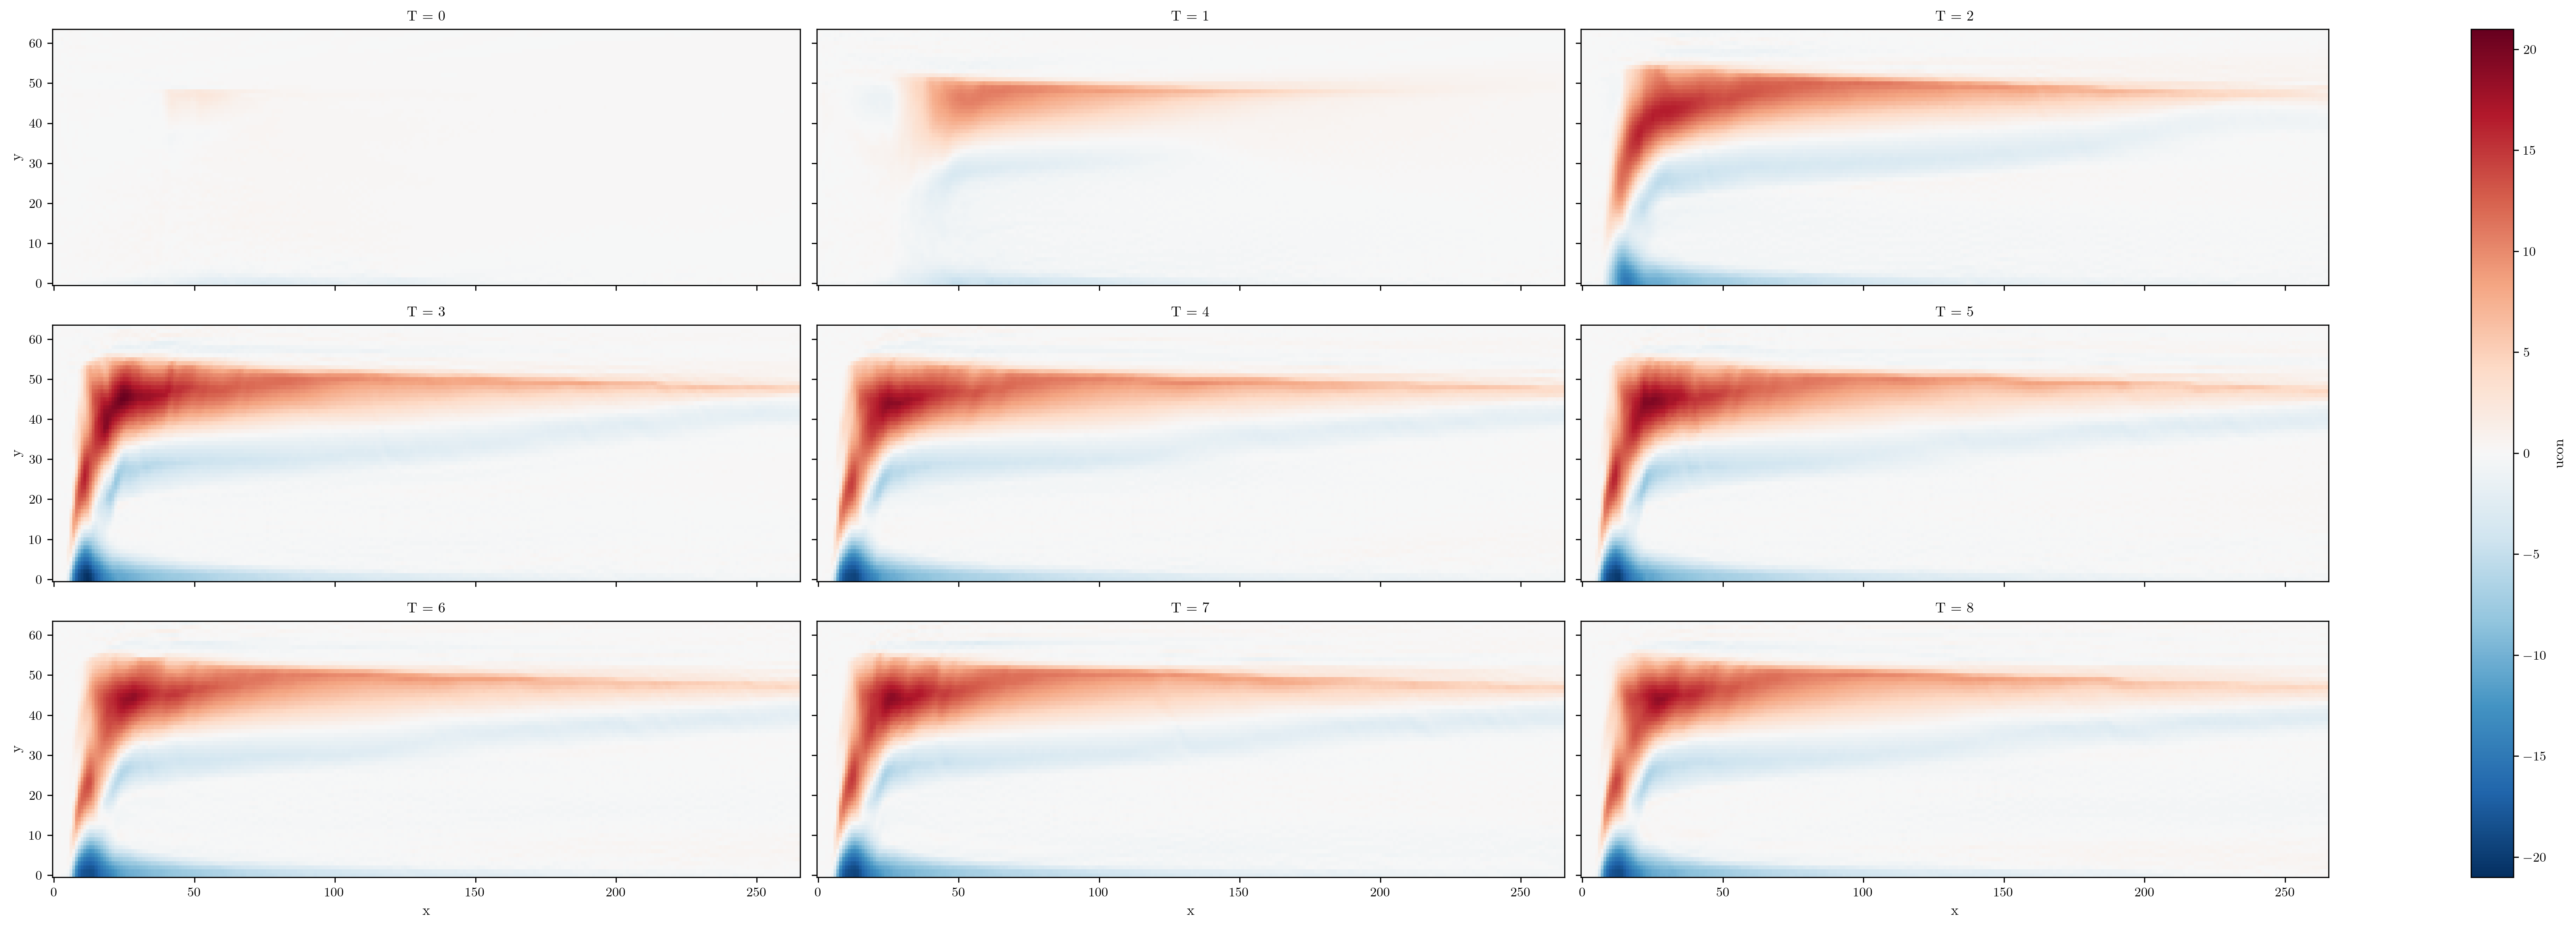

In [138]:
a.ucon.plot(x="x", y="y", col="T", col_wrap=3, aspect=3)

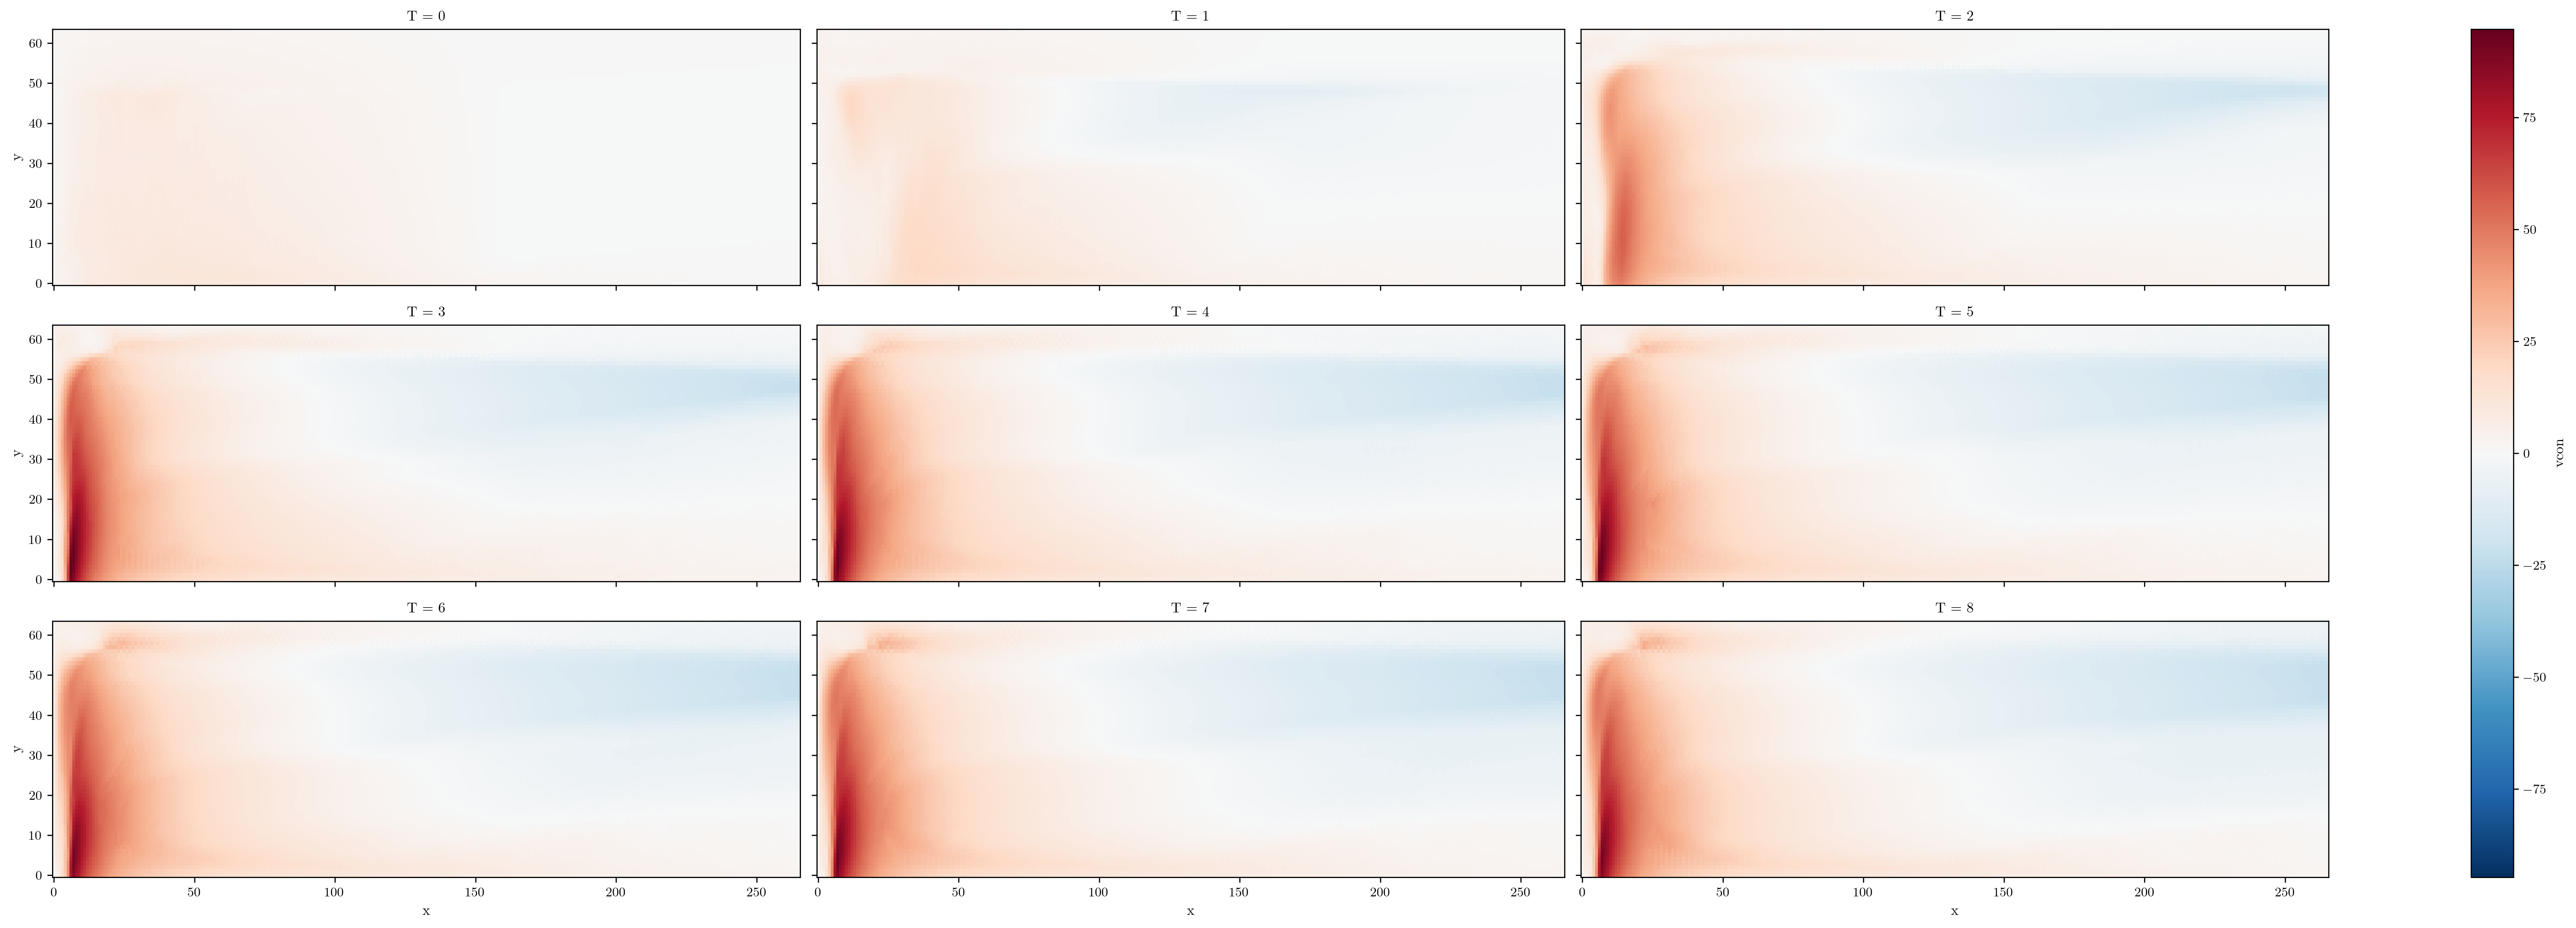

In [139]:
a.vcon.plot(x="x", y="y", col="T", col_wrap=3, aspect=3)

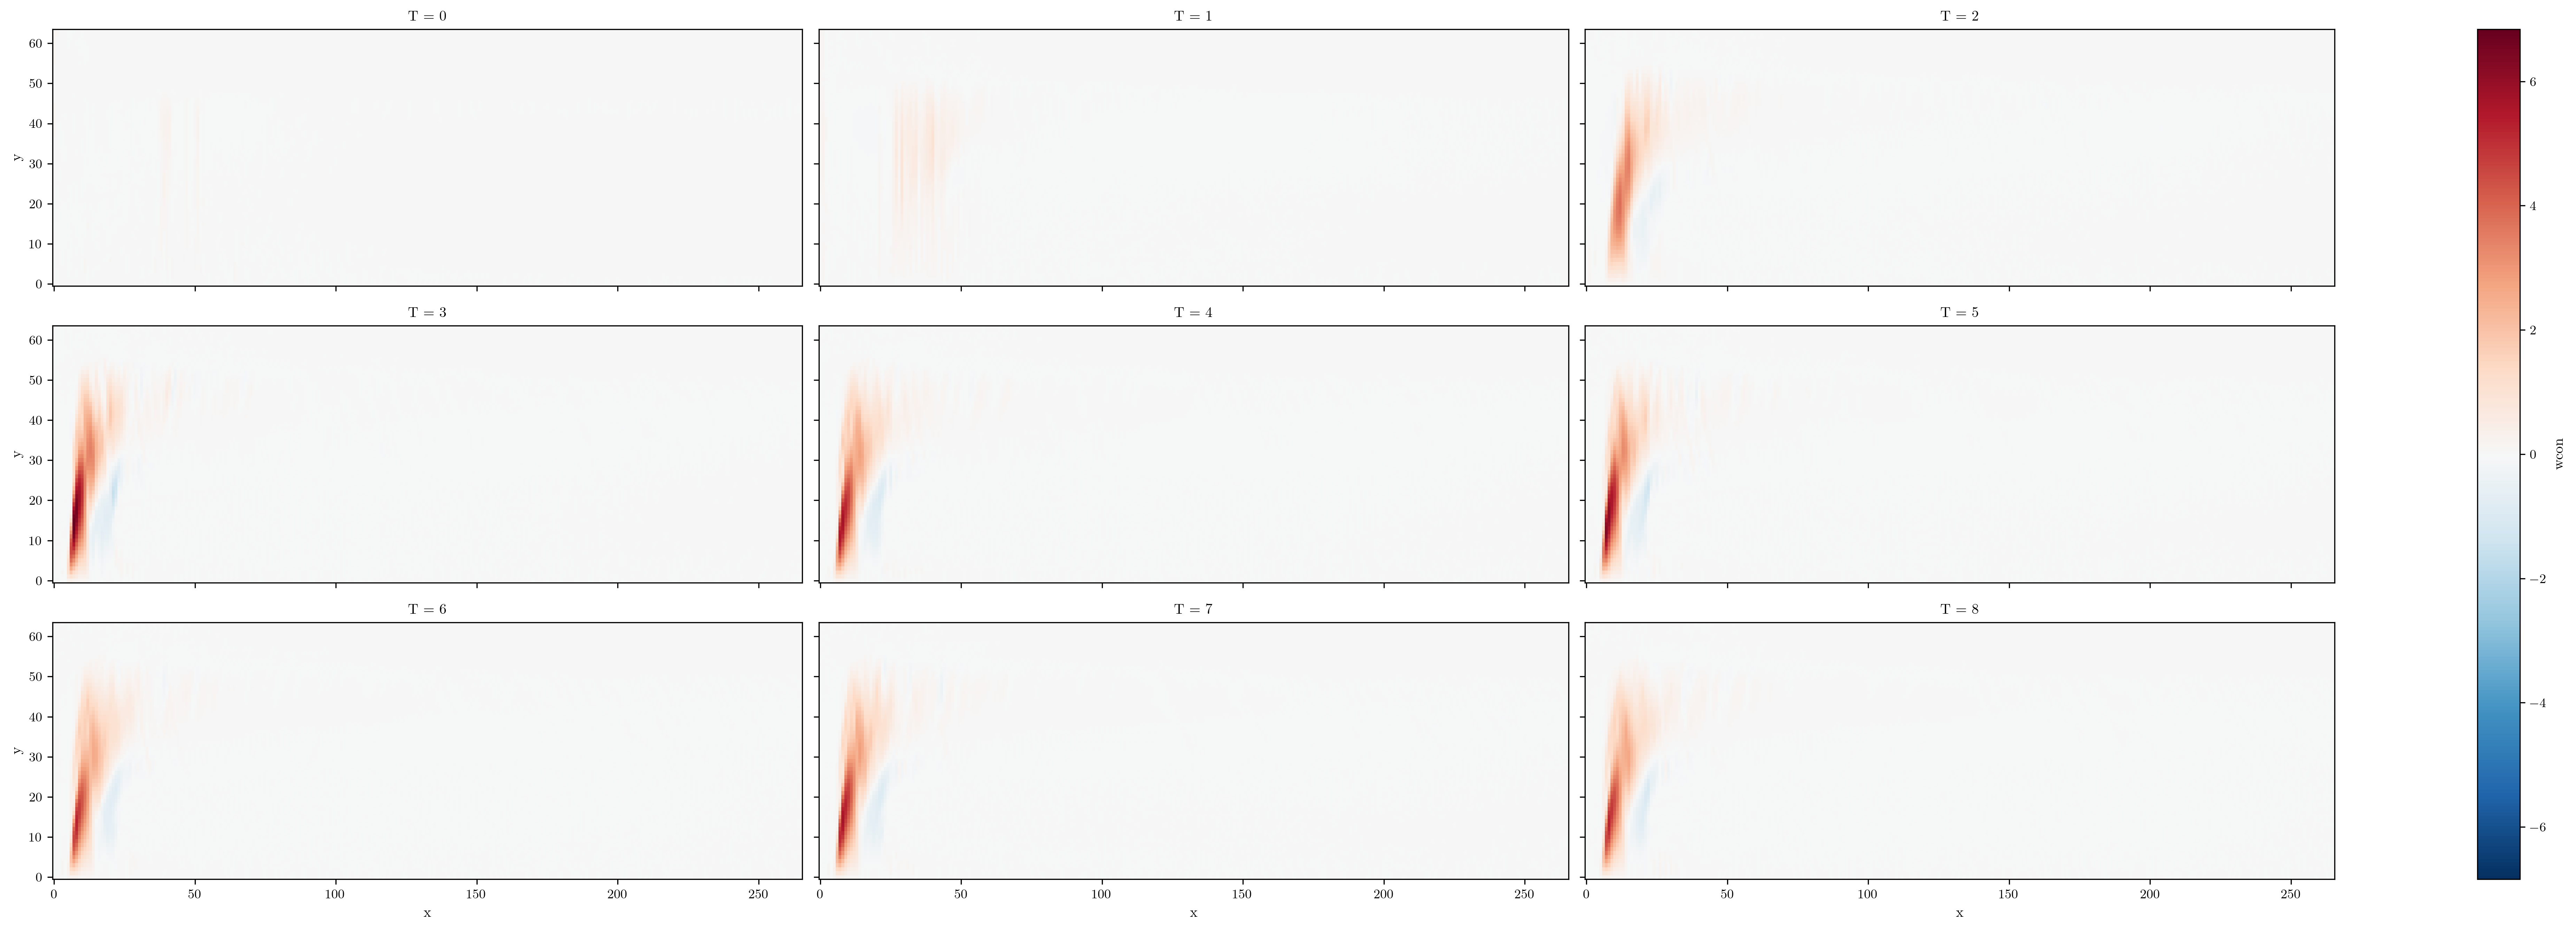

In [141]:
a.wcon.plot(x="x", y="y", col="T", col_wrap=3, aspect=3)

In [140]:
a

<xarray.Dataset>
Dimensions:  (T: 9, x: 266, y: 64)
Dimensions without coordinates: T, x, y
Data variables:
    ucon     (T, y, x) float32 0.02344 0.05 -0.02 -0.11 ... -0.03 -0.01 0.12
    vcon     (T, y, x) float32 1.286 1.7 3.49 4.11 ... -4.49 -4.62 -4.32 -4.39
    wcon     (T, y, x) float32 -0.003949 -0.0 0.01 0.0 ... -0.0 -0.0 -0.0 0.0
    tfcon    (T, y, x) float32 295.5 295.8 295.9 295.8 ... 189.6 189.5 189.5
    tescon   (T, y, x) float32 343.6 344.7 345.1 344.8 ... 438.9 438.7 438.7
    tecon    (T, y, x) float32 335.6 338.0 340.1 342.0 ... 438.9 438.7 438.6
    liqcon   (T, y, x) float32 0.002715 0.0 0.02 0.01 0.02 ... 0.0 0.0 0.0 0.0

In [60]:
d1, d2 = get_outputs()

/Users/simon/rotunno87/src/read_in_data.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [143]:
sout_ds.p

<xarray.DataArray 'p' (p: 63)>
array([959.9094, 925.7659, 892.6665, 860.5846, 829.4955, 799.3669, 770.1731,
       741.8951, 714.512 , 687.9977, 662.326 , 637.4645, 613.3868, 590.0773,
       567.5122, 545.6647, 524.5123, 504.0366, 484.223 , 465.0489, 446.4903,
       428.525 , 411.1396, 394.313 , 378.0243, 362.2629, 347.0103, 332.2517,
       317.9734, 304.1605, 290.7993, 277.8779, 265.3874, 253.3161, 241.6516,
       230.3837, 219.5022, 208.997 , 198.8597, 189.0814, 179.6537, 170.5689,
       161.8207, 153.4113, 145.3415, 137.6111, 130.247 , 123.2534, 116.5783,
       110.24  , 104.2317,  98.5662,  93.2148,  88.128 ,  83.3212,  78.7756,
        74.478 ,  70.4144,  66.5717,  62.9372,  59.5031,  56.2594,  53.1939],
      dtype=float32)
Coordinates:
  * p        (p) float32 959.9 925.8 892.7 860.6 ... 62.94 59.5 56.26 53.19
Attributes:
    units:    hPa

In [91]:
sin_ds.p

<xarray.DataArray 'p' (p: 46)>
array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,  775.,
        750.,  725.,  700.,  675.,  650.,  625.,  600.,  575.,  550.,  525.,
        500.,  475.,  450.,  425.,  400.,  375.,  350.,  325.,  300.,  275.,
        250.,  225.,  200.,  175.,  150.,  125.,  100.,   80.,   60.,   40.,
         30.,   25.,   20.,   15.,   10.,    5.], dtype=float32)
Coordinates:
  * p        (p) float32 1e+03 975.0 950.0 925.0 900.0 ... 20.0 15.0 10.0 5.0
Attributes:
    units:    hPa

In [115]:
def make_datasets():
    da_out = []
    da_out2 = []
    for key in d2:
        print(key)
        ds = xr.Dataset(
            data_vars={
                key: (["y", "x"], d2[key].astype("float32")),
            },
        )
        ds[key].attrs["long_name"] =  key
        def get_range(npa):
            return min(npa), max(npa)

        if np.all((0, 265) == get_range(ds[key]["x"].values)):
            da_out.append(ds[key])
        else:
            da_out2.append(ds[key].rename({"x":"y", "y": "x"}))
    ds = xr.merge(da_out)
    ds2 = xr.merge(da_out2)
    return ds, ds2
# ds.assign_coords({"p": ("y", sout_ds.p.values.tolist().append(50))})
ds, ds2 = make_datasets()

ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon


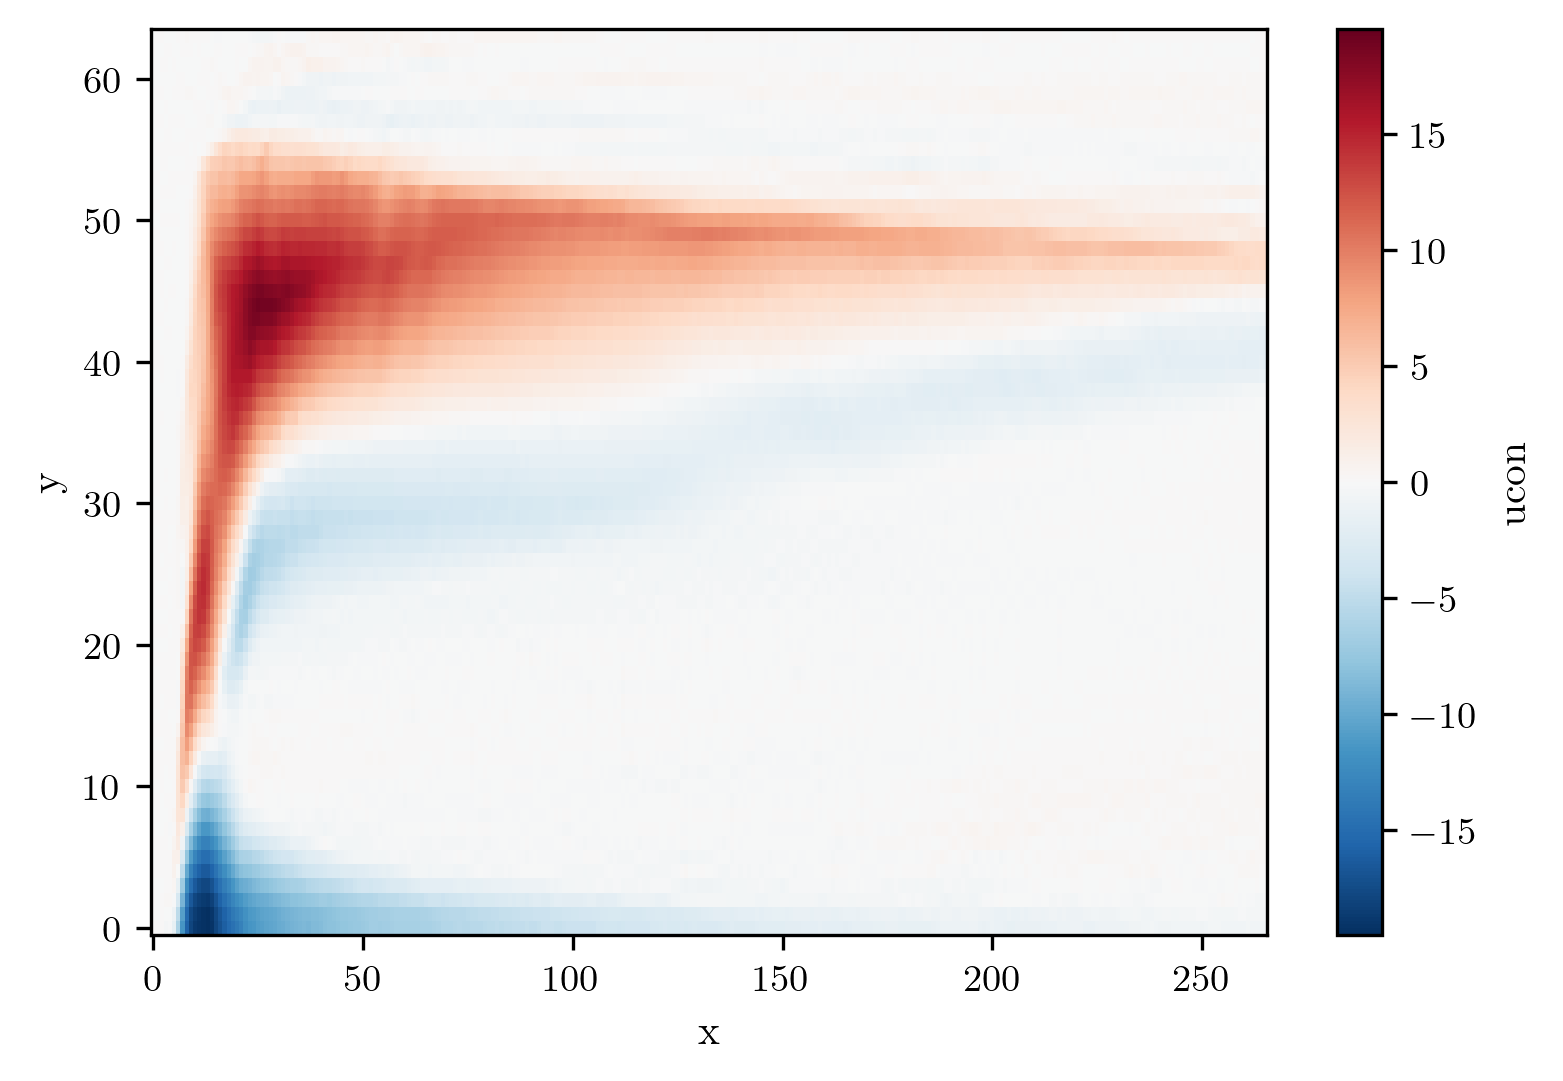

In [119]:
ds.ucon.plot()

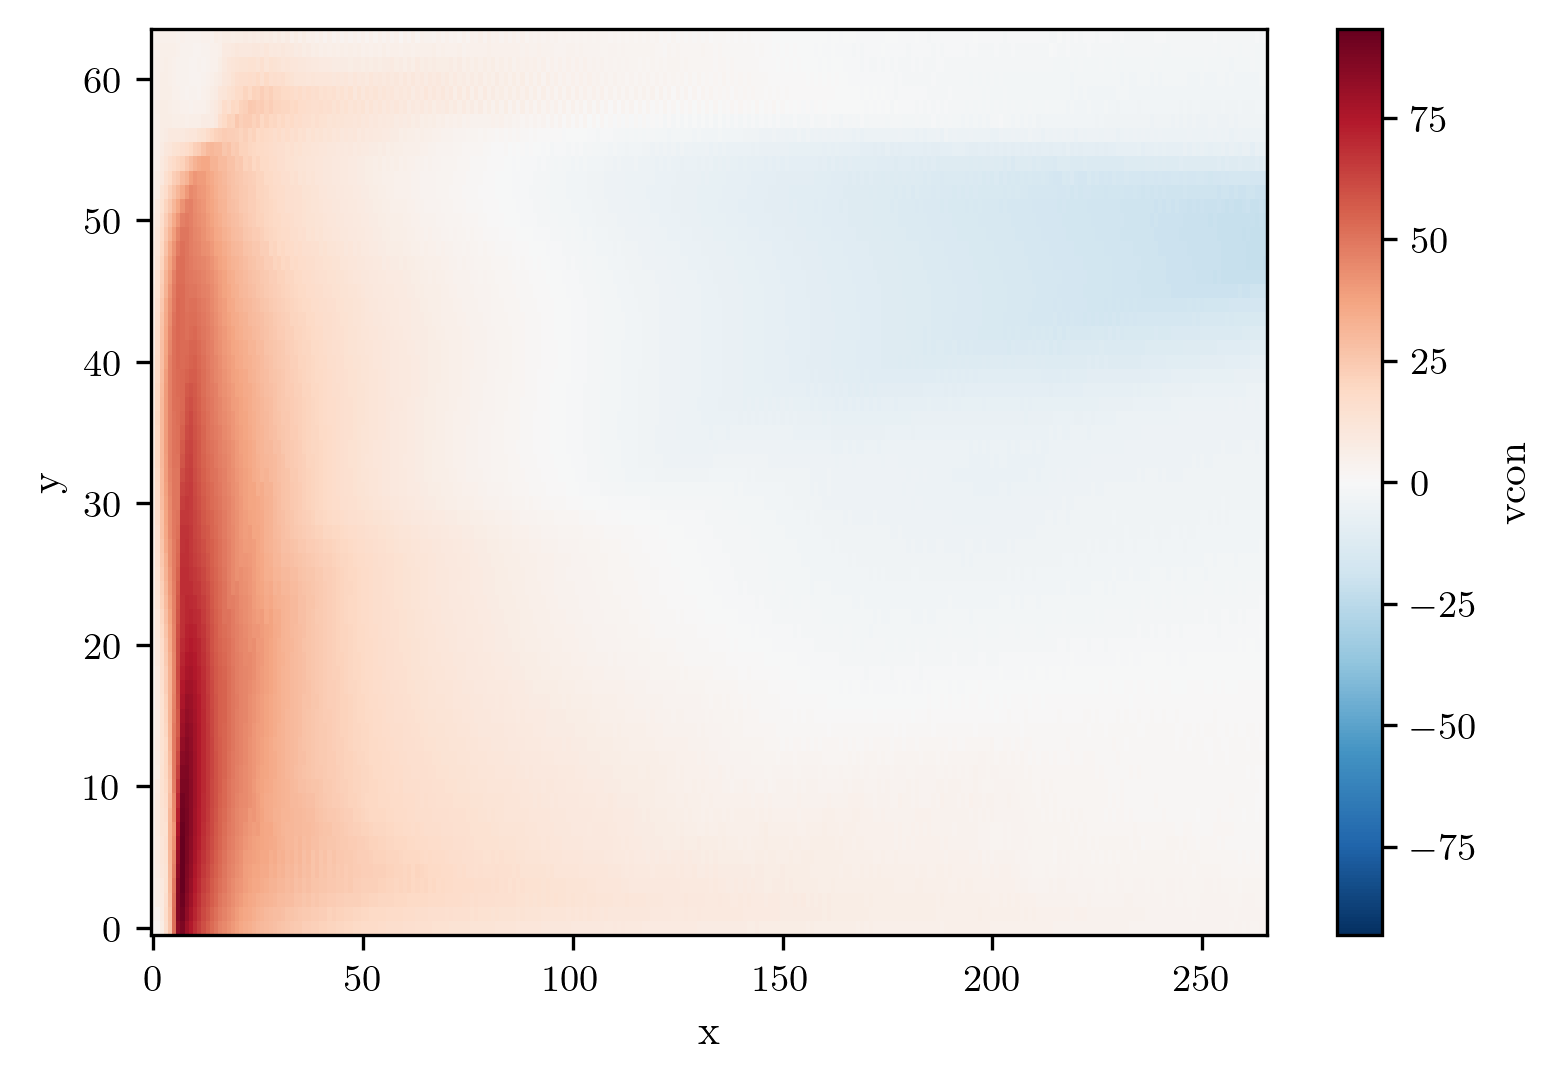

In [121]:
ds.vcon.plot()

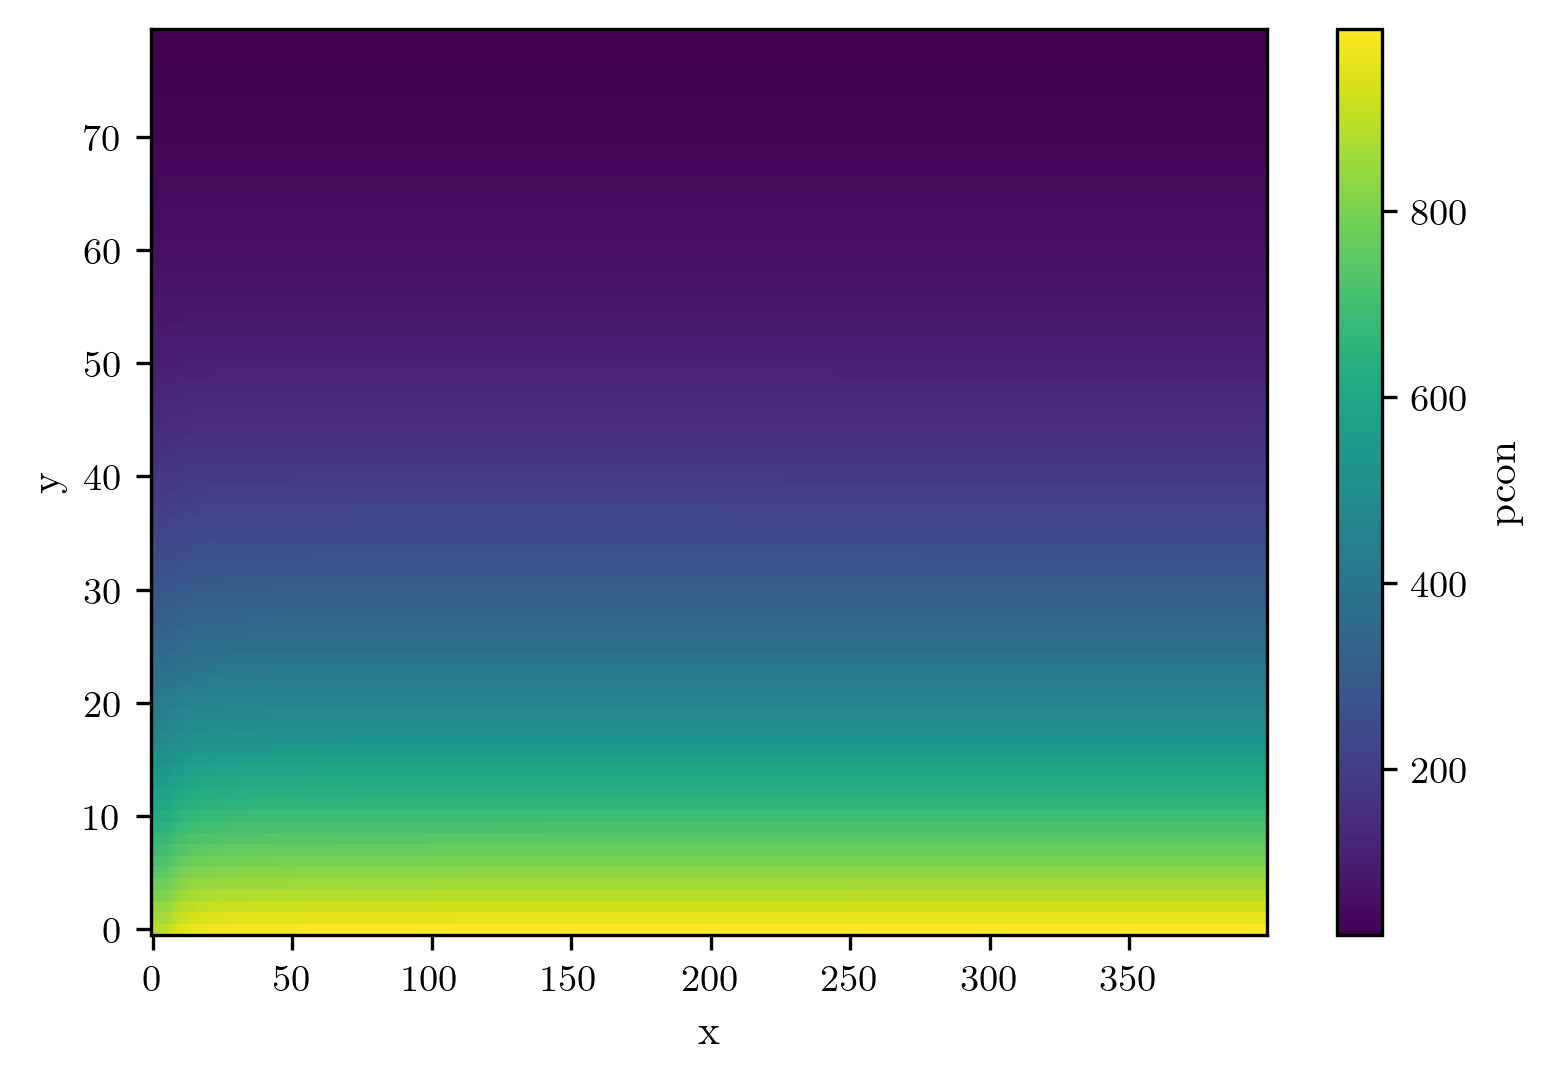

In [113]:
ds2.pcon.plot(x="x", y="y")

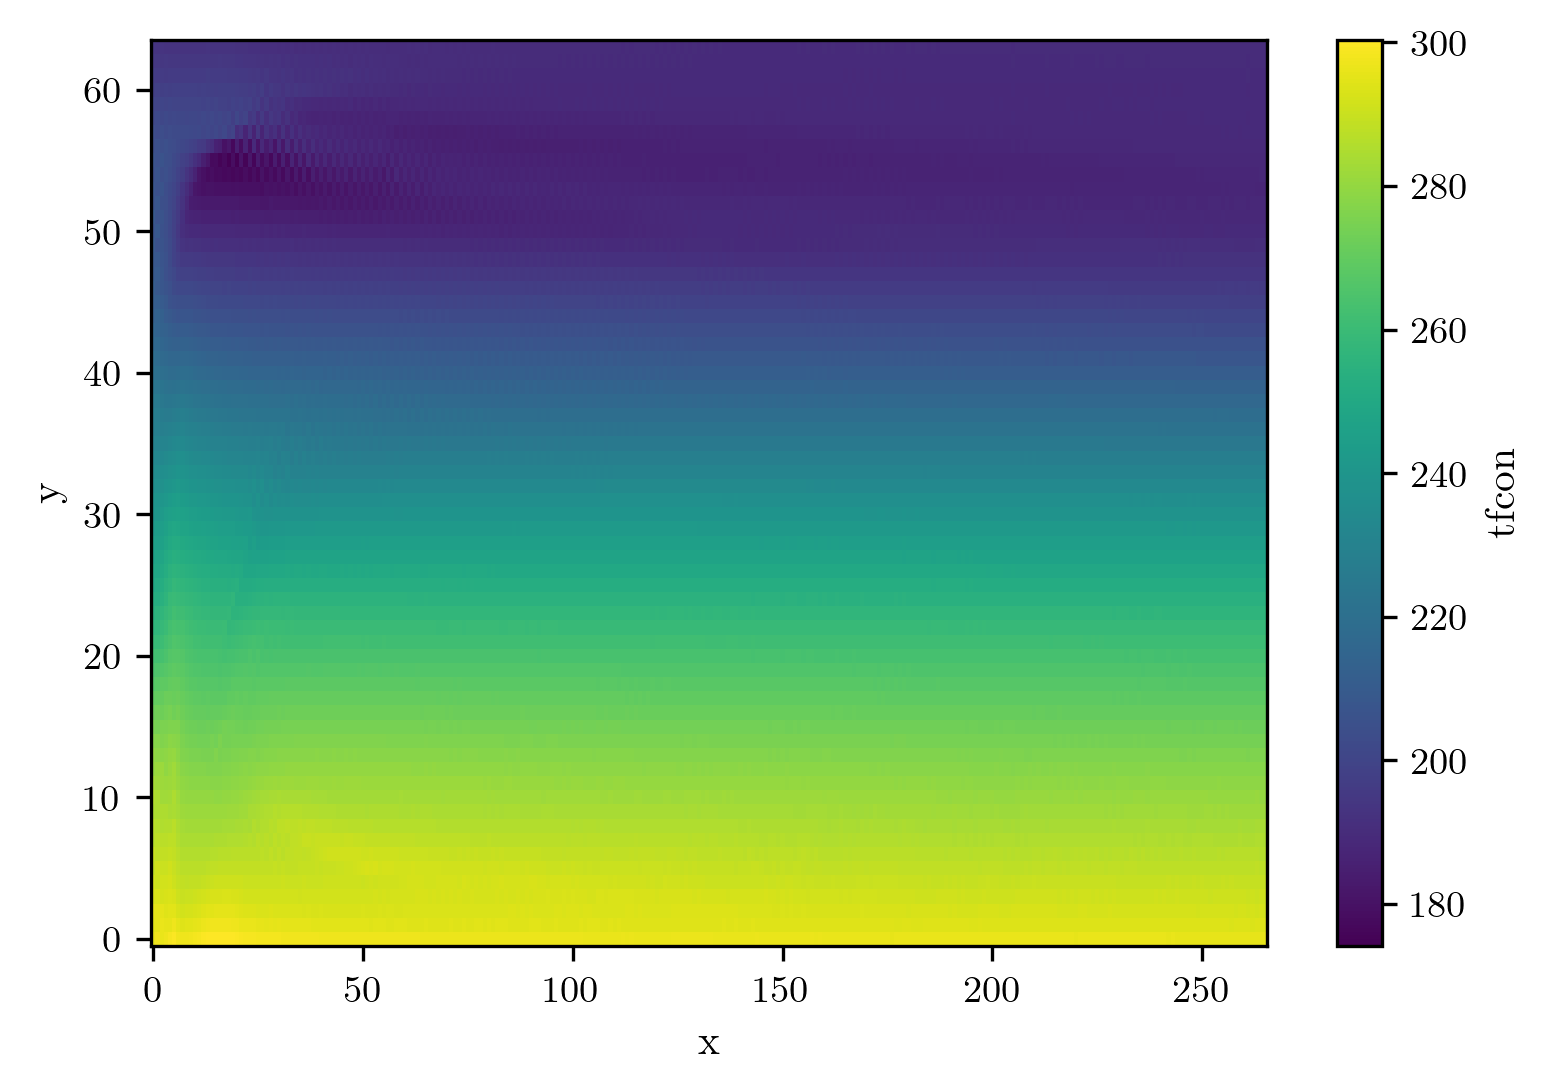

In [114]:
ds.tfcon.plot()

In [84]:
np.all((0, 265) == get_range(ds[key]["y"].values))

True

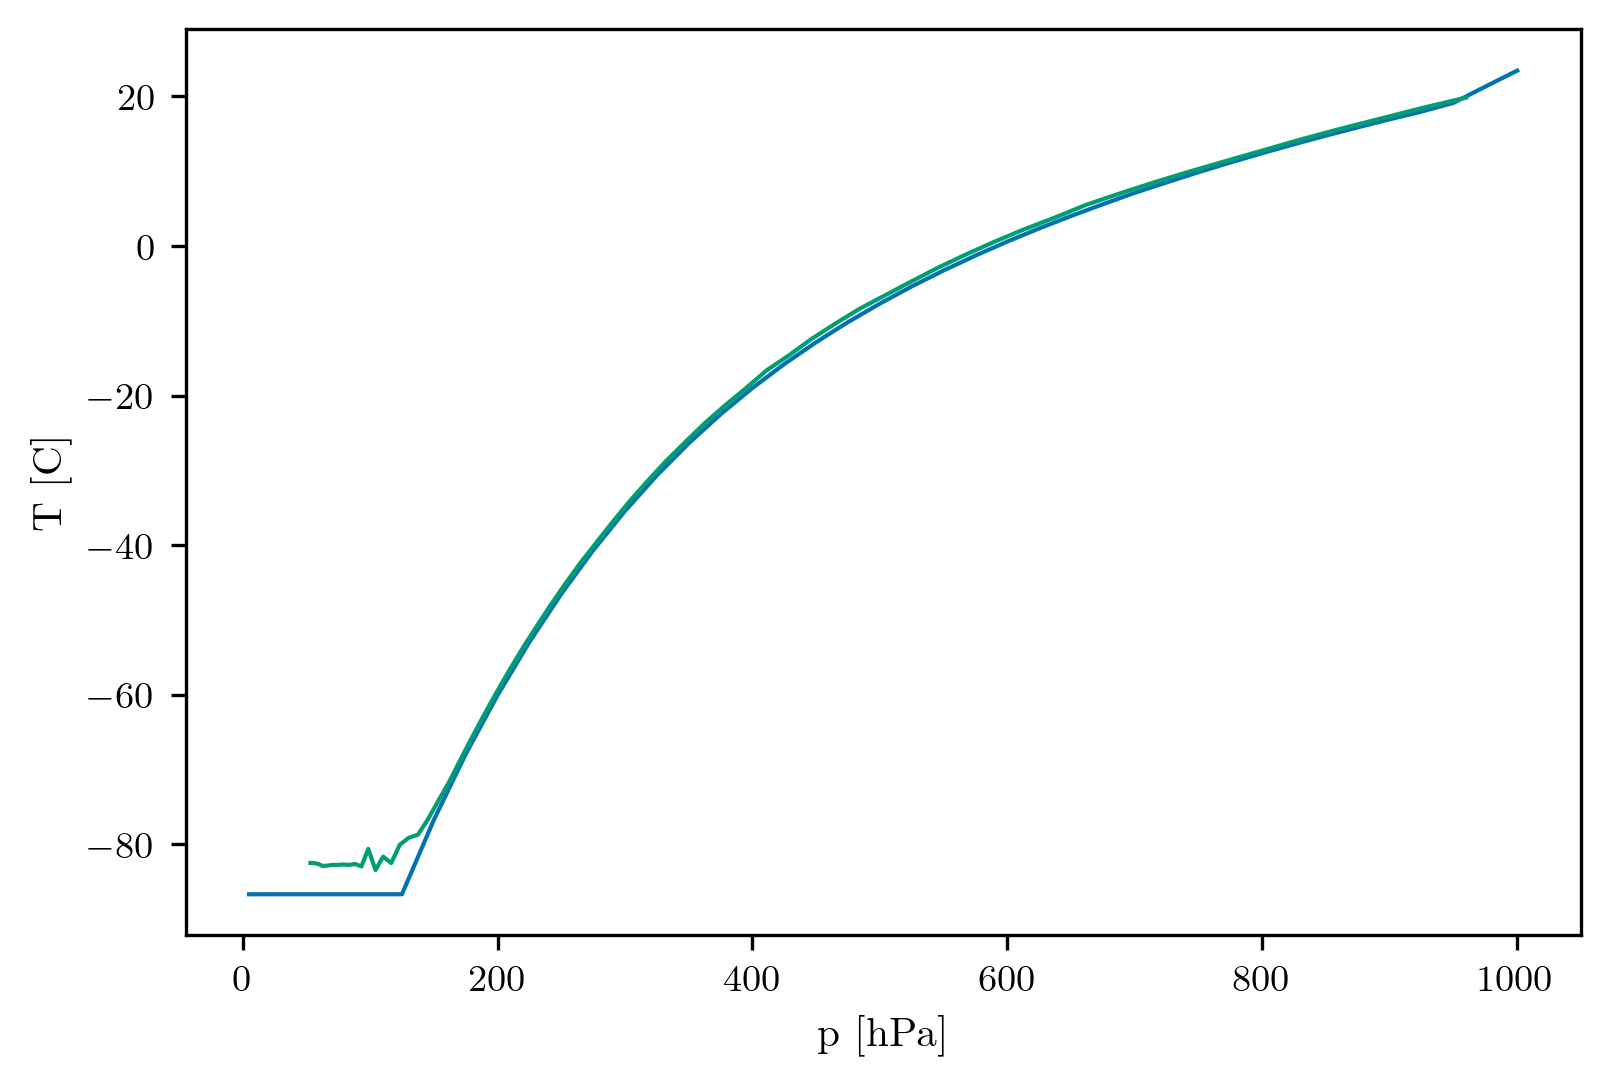

In [56]:
sin_ds.T.plot()
sout_ds.T.plot()

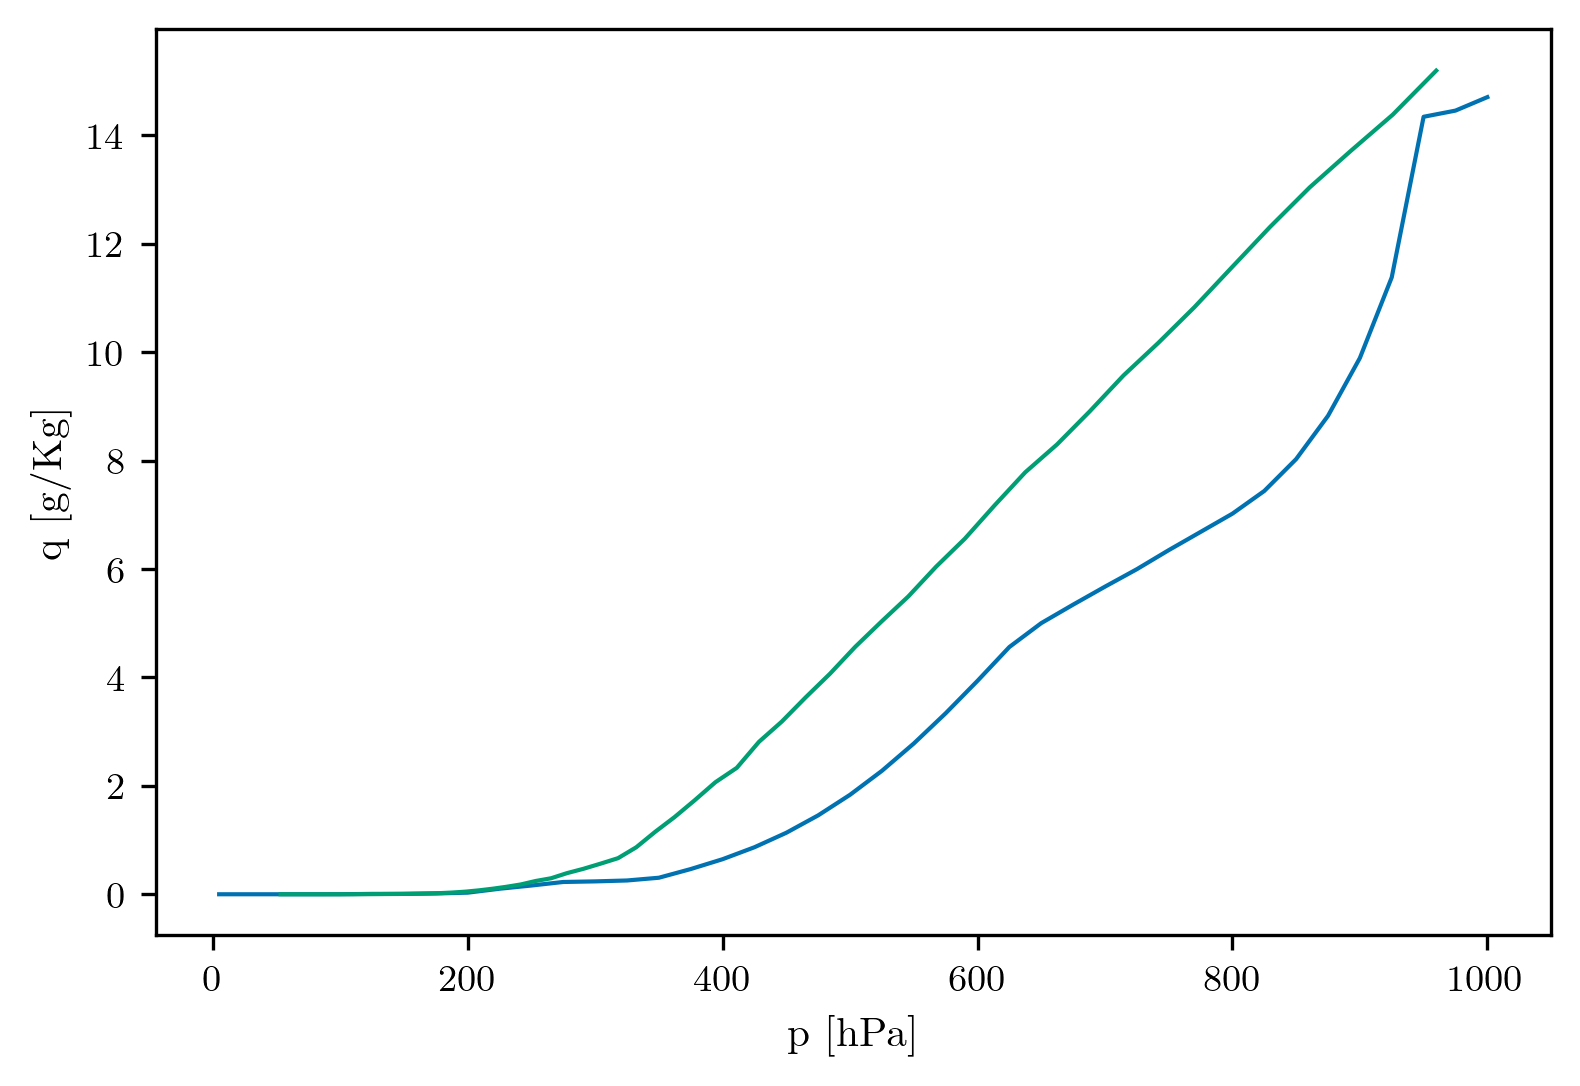

In [57]:
sin_ds.q.plot()
sout_ds.q.plot()

In [20]:
sin_npa[:, 1]

array(['23.451', '21.315', '19.140', '17.972', '16.941', '15.872',
       '14.763', '13.612', '12.415', '11.169', '9.868', '8.508', '7.114',
       '5.588', '4.014', '2.353', '0.594', '-1.277', '-3.272', '-5.408',
       '-7.702', '-10.178', '-12.863', '-15.787', '-18.987', '-22.504',
       '-26.384', '-30.677', '-35.433', '-40.700', '-46.529', '-52.967',
       '-60.080', '-67.961', '-76.761', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696', '-86.696', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696'], dtype='<U9')

In [ ]:
xr = xr.Datarray()

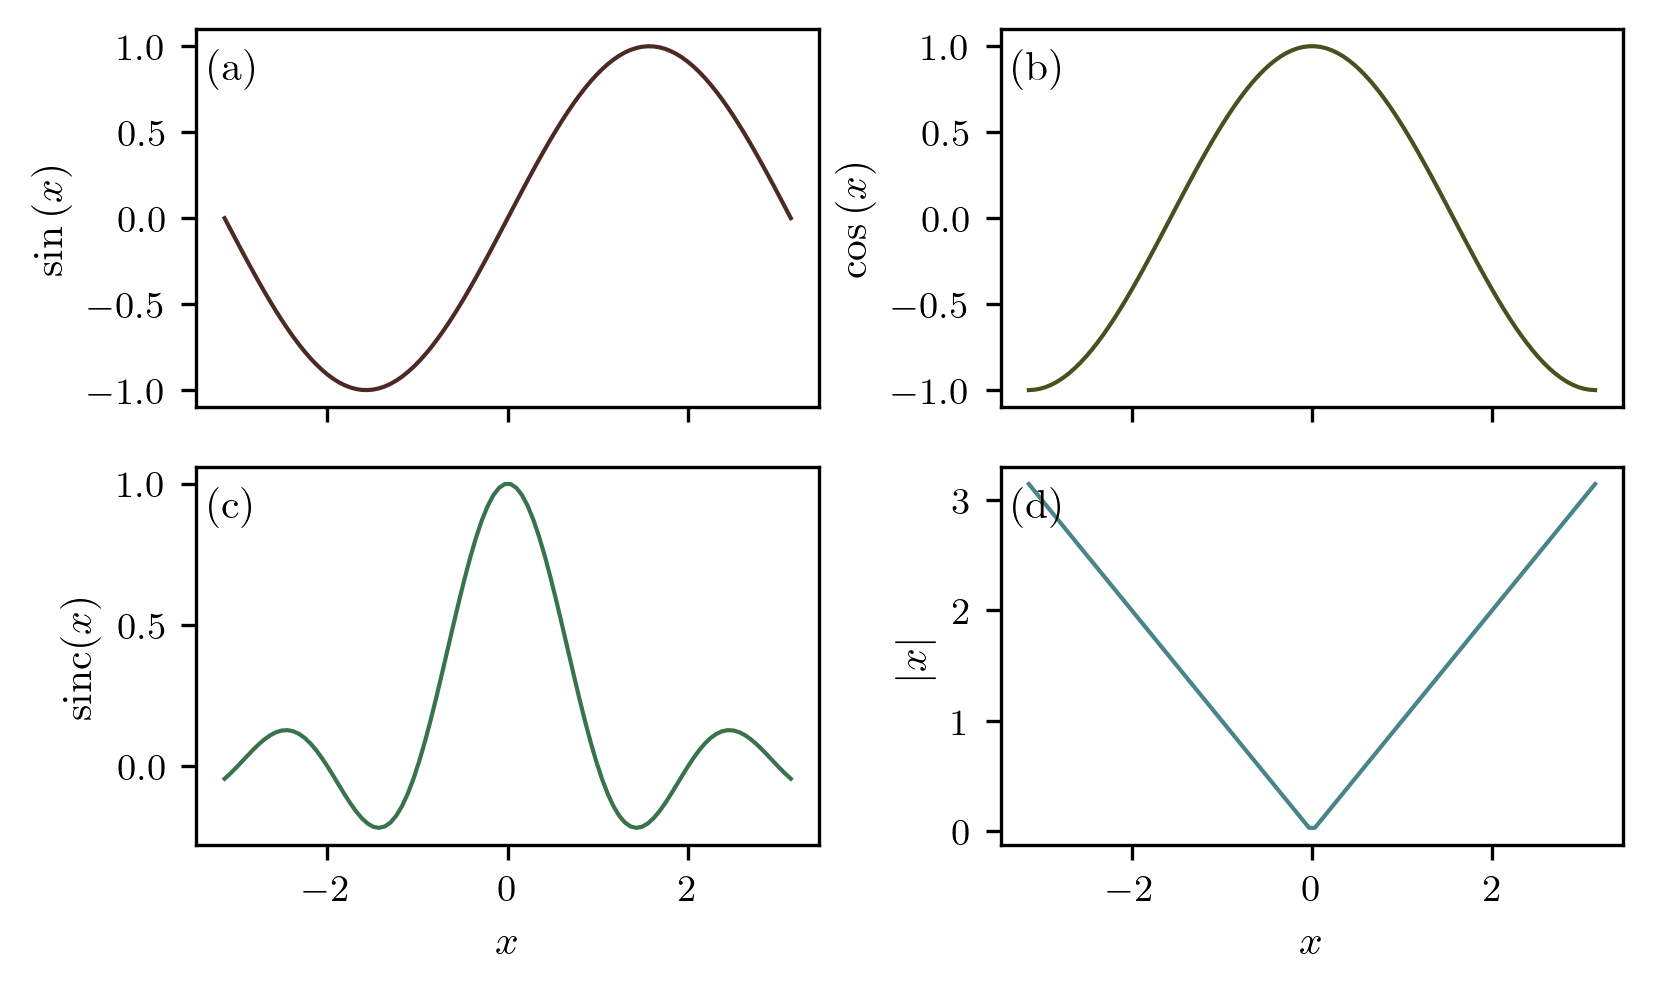

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True)

x = np.linspace(-np.pi, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=STD_CLR_LIST[0])
axs[0, 1].plot(x, np.cos(x), color=STD_CLR_LIST[1])
axs[1, 0].plot(x, np.sinc(x), color=STD_CLR_LIST[2])
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[3])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")
axs[1, 1].set_xlabel(r"$x$")
axs[1, 0].set_xlabel(r"$x$")


set_dim(fig, fraction_of_line_width=1, ratio=(5 ** 0.5 - 1) / 2)
label_subplots(axs, start_from=0, fontsize=10)
plt.tight_layout()
plt.show()

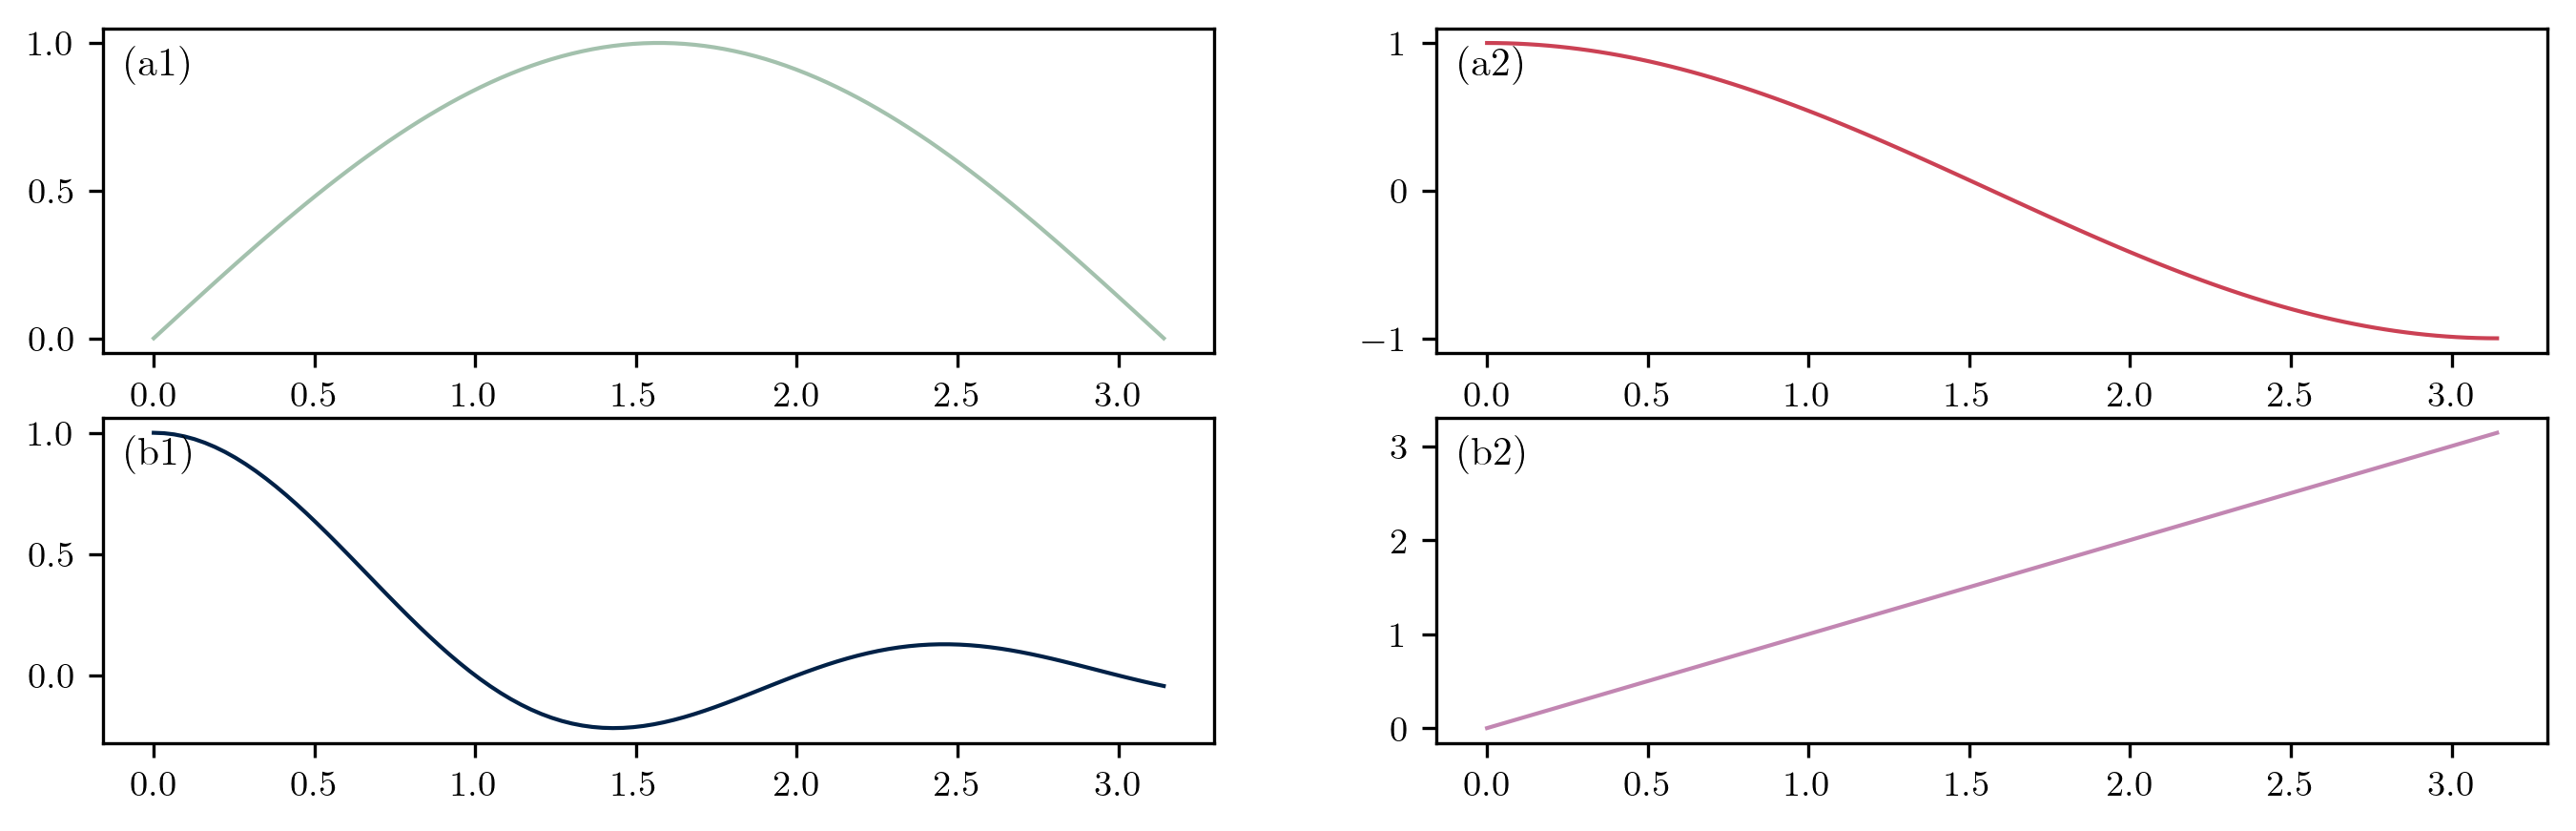

In [11]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(axs, labels=["a1", "a2", "b1", "b2"], start_from=0, fontsize=10)
plt.show()

In [5]:
ps_defaults(use_tex=False)

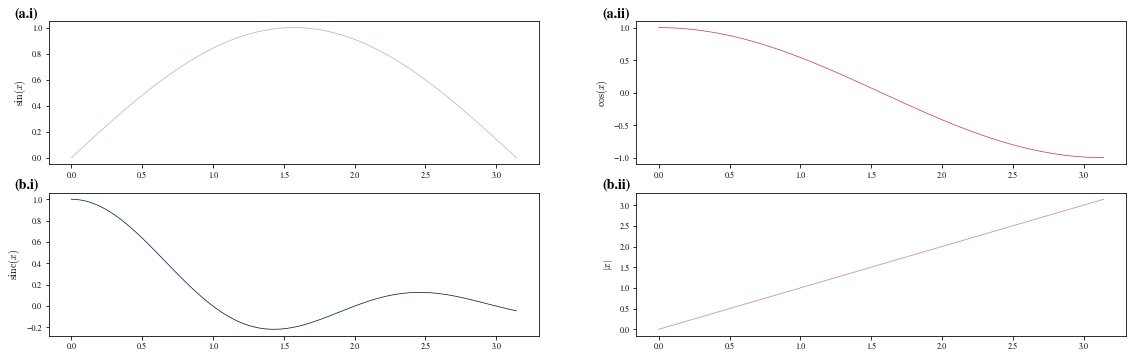

In [9]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(
    axs, labels=["a.i", "a.ii", "b.i", "b.ii"], 
    start_from=0, x_pos=-0.07, y_pos=1.1, fontsize=14
)